# Grand Canonical QMC

V. Gorelov (2017)

**Time step:** 0.01
**Slices:** 201
**RS:** 1.40

**T:** 0 K

Energies and chemical potential are given in Hartree, band gap values in eV

In [1]:
import numpy
import routines
import matplotlib
#matplotlib.use('svg')
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import savgol_filter
eV=27.2114

In [2]:
import sys
numpy.set_printoptions(threshold=sys.maxsize)

In [3]:
"function that does everything"
def GC_QMC(data,Vdata,mbeg,mend,mstep,Theta):
    mu = numpy.arange(mbeg,mend,mstep)
    nn = numpy.arange(-4,5,2)
#    nn = numpy.arange(-5,6)
    N = numpy.zeros((mu.shape[0],Theta))
    E = numpy.zeros((mu.shape[0],Theta))
    VE = numpy.zeros((mu.shape[0],Theta))
#    delta_test=numpy.zeros((nn.shape[0],Theta))

    for i,m in enumerate(mu):
        for theta in range(Theta):
            a=True
            for n,ni in enumerate(nn):
#                delta_test[n,theta]=(data[n+1,theta]-data[n+1-1,theta])/2.
                if (data[n+1,theta]-data[n+1-1,theta])/2.<=m and (data[n+1+1,theta]-data[n+1,theta])/2.>m and a:
#                    a = False
                    N[i,theta]=96+ni
                    E[i,theta]=data[n+1,theta]
                    VE[i,theta]=Vdata[n+1,theta]
    N[N == 0.] = numpy.nan
    E[E == 0.] = numpy.nan
    VN = numpy.nanmean(N**2, axis=1)
    N = numpy.nanmean(N, axis=1)
    E = numpy.nanmean(E, axis=1)
    VE = numpy.sqrt(numpy.sum(VE**2, axis=1))/Theta
    VN = numpy.sqrt((VN-N*N)/Theta)
    a=0.
    for i,m in enumerate(mu):
        if i<mu.shape[0]-2:
            if N[i]==96.: 
                a+=mstep
    return N,E,VE,VN, mu,#(a)*27.2114 #delta_test

In [4]:
"function that does everything"
def extend(test):
    bins=[80,82,84,86,88,90,92,94,96,98,100,102,104,106,108,110,112,114]
    time=True
    hist=numpy.histogram(test,bins)[0]
    for i,bi in enumerate(bins):
        firstbin=numpy.where(test==bi)[0]
        if(firstbin.shape[0] != 0 and time):
            time=False
            n=0
            for j in range(int(numpy.average(hist))-hist[i]):
                n+=1
                test[firstbin[0]-n]=bi
            for d in [2,4,6,8,10,12]:
                for j in range(int(numpy.average(hist))):
                    n+=1
                    test[firstbin[0]-n]=bi-d

    time=True
    for i,bi in enumerate(numpy.flip(bins,0)):
        lastbin=numpy.where(test==bi)[0]
        if(lastbin.shape[0] != 0 and time):
            time=False
            n=0
            for j in range(int(numpy.average(hist))-hist[-i]):
                n+=1
                test[lastbin[-1]+n]=bi
            for j in range(int(numpy.average(hist))):
                n+=1
                test[lastbin[-1]+n]=bi+2
            for d in [2,4,6,8,10,12]:
                for j in range(int(numpy.average(hist))):
                    n+=1
                    test[lastbin[-1]+n]=bi+d

    return test

def GC_QMC_test(data,Vdata,mbeg,mend,mstep,Theta):
    mu = numpy.arange(mbeg,mend,mstep)
    nn = numpy.arange(-4,5,2)
#    nn = numpy.arange(-5,6)
    N = numpy.zeros((mu.shape[0],Theta))
    E = numpy.zeros((mu.shape[0],Theta))
    VE = numpy.zeros((mu.shape[0],Theta))
#    delta_test=numpy.zeros((nn.shape[0],Theta))

    for i,m in enumerate(mu):
        for theta in range(Theta):
            a=True
            for n,ni in enumerate(nn):
#                delta_test[n,theta]=(data[n+1,theta]-data[n+1-1,theta])/2.
                if (data[n+1,theta]-data[n+1-1,theta])/2.<=m and (data[n+1+1,theta]-data[n+1,theta])/2.>m and a:
#                    a = False
                    N[i,theta]=96+ni
                    E[i,theta]=data[n+1,theta]
                    VE[i,theta]=Vdata[n+1,theta]
    for i in range(Theta):
        N[:,i]=extend(N[:,i])
    N[N == 0.] = numpy.nan
    E[E == 0.] = numpy.nan
    VN = numpy.nanmean(N**2, axis=1)
    N = numpy.nanmean(N, axis=1)
    E = numpy.nanmean(E, axis=1)
    VE = numpy.sqrt(numpy.sum(VE**2, axis=1))/Theta
    VN = numpy.sqrt((VN-N*N)/Theta)
    a=0.
    for i,m in enumerate(mu):
        if i<mu.shape[0]-2:
            if N[i]==96.: 
                a+=mstep
    return N,E,VE,VN, mu,(a)*27.2114 #delta_test

In [5]:
"function that does everything for spin polarised"
def GC_QMC_pol(data,Vdata,mbeg,mend,mstep,Theta,Ne):
    mu = numpy.arange(mbeg,mend,mstep)
#    nn = numpy.arange(-4,5,2)
    nn = numpy.arange(-(Ne-2),Ne-1,2)
    N = numpy.zeros((mu.shape[0],Theta))
    E = numpy.zeros((mu.shape[0],Theta))
    VE = numpy.zeros((mu.shape[0],Theta))
#    delta_test=numpy.zeros((nn.shape[0],Theta))

    for i,m in enumerate(mu):
        for theta in range(Theta):
            a=True
            for n,ni in enumerate(nn):
#                delta_test[n,theta]=(data[n+1,theta]-data[n+1-1,theta])/2.
                if (data[n+1,theta]-data[n+1-1,theta])/2.<=m and (data[n+1+1,theta]-data[n+1,theta])/2.>m and a:
#                    a = False
                    N[i,theta]=96+ni
                    E[i,theta]=data[n+1,theta]
                    VE[i,theta]=Vdata[n+1,theta]
    N[N == 0.] = numpy.nan
    E[E == 0.] = numpy.nan
    VN = numpy.nanmean(N**2, axis=1)
    N = numpy.nanmean(N, axis=1)
    E = numpy.nanmean(E, axis=1)
    VE = numpy.sqrt(numpy.sum(VE**2, axis=1))/Theta
    VN = numpy.sqrt((VN-N*N)/Theta)
    a=0.
    for i,m in enumerate(mu):
        if i<mu.shape[0]-2:
            if N[i]==96.: 
                a+=mstep
    return N,E,VE,VN, mu,(a)*27.2114

# Analyses for C2C 

In [4]:
"load data for C2C"
M=108
nconf=[300,350,400]
nconf_e=[450,500,550]
dataC2C=[]
VdataC2C=[]
dataC2C.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP250/RUNS/RMC_6/rmc13%s.excite' % k),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in ['m6_opt','m4_opt','m2_opt','','p2_opt','p4_opt','p6_opt'])
                            ))
VdataC2C.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP250/RUNS/RMC_6/rmc13%s.excite' % k),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in ['m6_opt','m4_opt','m2_opt','','p2_opt','p4_opt','p6_opt'])
                             ))

for i in nconf:
    dataC2C.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP%d/RMC/rmc%d.np.1.excite' % (i, k)),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            ))
    VdataC2C.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP%d/RMC/rmc%d.np.1.excite' % (i, k)),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             ))
for i in nconf_e:
    dataC2C.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2cp%d/C2cp%dt02np32%d.np.1.excite' % (i,i,k)),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            ))
    VdataC2C.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2cp%d/C2cp%dt02np32%d.np.1.excite' % (i,i,k)),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             ))

In [16]:
"load data C2C P250 more"
M=256
dataC2CP250_8=numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP250/RMC8/rmc%d.np.1.excite' % k),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-8,9,2))
                            )
VdataC2CP250_8=numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP250/RMC8/rmc%d.np.1.excite' % k),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-8,9,2))
                             )

In [17]:
"load data for C2C P300, +-10 electrons"
M=108
nconf=[300]
dataC2C10=[]
VdataC2C10=[]
for i in nconf:
    dataC2C10.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP%d/RMC/rmc%d.np.1.excite' % (i, k)),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-10,11,2))
                            ))
    VdataC2C10.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP%d/RMC/rmc%d.np.1.excite' % (i, k)),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-10,11,2))
                             ))


In [12]:
"load data for C2C P300, spin polarised"
M=108
nconf=[300]
dataC2Cspin=[]
VdataC2Cspin=[]
for i in nconf:
    dataC2Cspin.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP%d/RMC/rmc%d.np.1.excite' % (i, k)),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7))
                            ))
    VdataC2Cspin.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP%d/RMC/rmc%d.np.1.excite' % (i, k)),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7))
                             ))


In [34]:
dataC2Cspin[0][1][24]=dataC2Cspin[0][1][23]

In [4]:
"load data C2C P450 Optimized"
M=108
dataC2CP450=numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2cp450/C2cp450_OPT/C2cp450/C2cp450t02np32%d.np.1.excite' % k),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            )
VdataC2CP450=numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2cp450/C2cp450_OPT/C2cp450/C2cp450t02np32%d.np.1.excite' % k),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             )

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if __name__ == '__main__':


In [3]:
"load data for C2C P300 twist"
M=256
nconf=[300]
dataC2Ctwist=[]
VdataC2Ctwist=[]
for i in nconf:
    dataC2Ctwist.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP%d/RMC_Twist/rmc%d.np.1.excite' % (i, k)),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            ))
    VdataC2Ctwist.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2CP%d/RMC_Twist/rmc%d.np.1.excite' % (i, k)),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             ))


In [10]:
Dispersion(dataC2Ctwist)

(array([0.00305837]), array([0.00100919]))

In [13]:
Dispersion(dataC2C,Nc=6)

(array([0.00284234, 0.00303037, 0.00346385, 0.00375514, 0.00432819,
        0.00459343]),
 array([0.00078622, 0.00077655, 0.00097149, 0.00102001, 0.00103284,
        0.0011804 ]))

In [9]:
def Dispersion(dataC2C,Nc=1):
    plt.figure(figsize=(10,10))
    Nplus=numpy.zeros(Nc)
    Nzero=numpy.zeros(Nc)
    for i in range(Nc):
            Nplus[i]=numpy.average((dataC2C[i][4]-dataC2C[i][3])**2)-numpy.average((dataC2C[i][4]-dataC2C[i][3]))**2
            Nzero[i]=numpy.average((dataC2C[i][3]-dataC2C[i][2])**2)-numpy.average((dataC2C[i][3]-dataC2C[i][2]))**2
    return Nplus, Nzero
    #plt.plot(Nplus, '^')
    #plt.plot(Nzero, 's')

In [13]:
"load data for C2C P550 twist"
M=70
nconf=[550]
dataC2Ctwist550=[]
VdataC2Ctwist550=[]
for i in nconf:
    dataC2Ctwist550.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2cp%d_twist/C2cp%dt02np32%d.np.1.excite' % (i,i,k)),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            ))
    VdataC2Ctwist550.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2cp%d_twist/C2cp%dt02np32%d.np.1.excite' % (i,i,k)),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             ))
dataC2Ctwist550=numpy.append(dataC2Ctwist550[0],
             numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2cp%d_trans/C2cp%dt02np32%d.np.1.excite' % (i,i,k)),
                                                               usecols=(range(0,16*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))),axis=1)
VdataC2Ctwist550=numpy.append(VdataC2Ctwist550[0],
             numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2cp%d_trans/C2cp%dt02np32%d.np.1.excite' % (i,i,k)),
                                                               usecols=(range(0,16*2,2)), skiprows=10))[1] 
                              for k in range(-6,7,2))),axis=1)
dataC2Ctwist550=numpy.append(dataC2Ctwist550,
             numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2cp%d_more/C2cp%dt02np32%d.np.1.excite' % (i,i,k)),
                                                               usecols=(range(0,210*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))),axis=1)
VdataC2Ctwist550=numpy.append(VdataC2Ctwist550,
             numpy.stack((routines.AverageAndVar(numpy.loadtxt(('C2cp%d_more/C2cp%dt02np32%d.np.1.excite' % (i,i,k)),
                                                               usecols=(range(0,210*2,2)), skiprows=10))[1] 
                              for k in range(-6,7,2))),axis=1)


In [37]:
dataC2Ctwist550.shape[1]

296

In [38]:
print("the grid should not be less than this value")
a=0.
a+=max(routines.AverageAndVar(numpy.loadtxt('C2CP300/RMC_Twist/rmc-6.np.1.excite',
                                                usecols=(range(0,M*2,2)), skiprows=10))[1]/numpy.sqrt(2.)
          )
print(a)

the grid should not be less than this value
0.0069966785339500015


In [189]:
GC_dataC2CP300_left=GC_QMC(dataC2C[1],VdataC2C[1],0.2,0.6,0.005,108)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [5]:
GC_dataC2C=[]
for i in range(4):
    GC_dataC2C.append(GC_QMC(dataC2C[i],VdataC2C[i],0.2,0.6,0.005,108))
for i in range(4,7):
    GC_dataC2C.append(GC_QMC(dataC2C[i],VdataC2C[i],0.37,0.7,0.005,108))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [18]:
GC_dataC2CP250_8=GC_QMC(dataC2CP250_8,VdataC2CP250_8,0.1,0.6,0.005,256)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [5]:
GC_dataC2CP450=GC_QMC(dataC2CP450,VdataC2CP450,0.1,0.6,0.005,108)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [19]:
GC_dataC2CP300_8=GC_QMC(dataC2C10[0][1:-1],VdataC2C10[0][1:-1],0.1,0.6,0.005,108)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [39]:
numpy.set_printoptions(threshold=numpy.nan)
GC_C2CP300_test=GC_QMC_test(dataC2C[1],VdataC2C[1],0.,0.8,0.005,108)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: Mean of empty slice


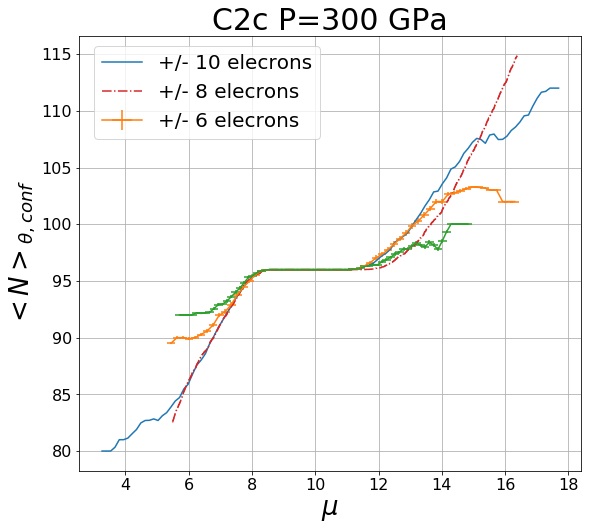

In [53]:
plt.figure(figsize=(9, 8))
plt.tick_params(labelsize=16)
plt.title('C2c P=300 GPa', fontsize=30)
plt.xlabel("$\mu$", fontsize=26)
plt.grid()
plt.ylabel('$<N>_{\\theta,conf}$', fontsize=26)


plt.plot(GC_C2CP300_test[4]*eV,GC_C2CP300_test[0],'-')
plt.errorbar(GC_dataC2C10[0][4]*eV,GC_dataC2C10[0][0],xerr=0.005*eV,yerr=GC_dataC2C10[0][3],fmt='-')
#plt.errorbar(GC_dataC2C8[0][4]*eV,GC_dataC2C8[0][0],xerr=0.005*eV,yerr=GC_dataC2C8[0][3],fmt='-')
plt.errorbar(GC_dataC2C[1][4]*eV,GC_dataC2C[1][0],xerr=0.005*eV,yerr=GC_dataC2C[1][3],fmt='-')
plt.plot((GC_C2CP300_HSE_256[0]+0.05),GC_C2CP300_HSE_256[1]*2,'-.')
#plt.ylim(94,98)
#plt.xlim(7.5,12.5)
plt.legend(['+/- 10 elecrons','+/- 8 elecrons','+/- 6 elecrons'],bbox_to_anchor=(0.5, 1),fontsize=20)
#plt.savefig('/local/home/vgorelov/Documents/Thesis/N_mu_Conv_Ne.png',dpi=300,format='png')


In [40]:
GC_VMC=numpy.loadtxt('C2CP300/GC_vmc.out')

In [432]:
dataC2C10[0][1:-1].shape

(9, 108)

In [52]:
GC_dataC2C10=[]
for i in range(1):
    GC_dataC2C10.append(GC_QMC_pol(dataC2C10[i],VdataC2C10[i],0.2,0.6,0.007,108,10))

In [130]:
GC_dataC2C8=[]
for i in range(1):
    GC_dataC2C8.append(GC_QMC_pol(dataC2C10[i][1:-1],VdataC2C10[i][1:-1],0.2,0.6,0.007,108,8))

In [54]:
GC_dataC2C4=[]
for i in range(1):
    GC_dataC2C4.append(GC_QMC(dataC2C10[i][3:-3],VdataC2C10[i][3:-3],0.2,0.6,0.007,108))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [35]:
GC_dataC2Cspin=[]
for i in range(1):
    GC_dataC2Cspin.append(GC_QMC_pol(dataC2Cspin[i],VdataC2Cspin[i],0.2,0.6,0.007,108))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [8]:
GC_dataC2Ctwist=[]
for i in range(1):
    GC_dataC2Ctwist.append(GC_QMC(dataC2Ctwist[i],VdataC2Ctwist[i],0.2,0.6,0.008,256))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [43]:
GC_dataC2CTWIST=[]
for i in range(1):
    GC_dataC2CTWIST.append(GC_QMC(numpy.append(dataC2Ctwist[0],dataC2C[1],axis=1),
                                  numpy.append(VdataC2Ctwist[0],VdataC2C[1],axis=1),0.2,0.6,0.008,256+108))
    GC_dataC2CTWIST.append(GC_QMC(dataC2C[1][:,1::2],VdataC2C[1][:,1::2],0.2,0.6,0.008,54))
    GC_dataC2CTWIST.append(GC_QMC(dataC2C[1][:,::4],VdataC2C[1][:,::4],0.2,0.6,0.008,27))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [44]:
"trans and long directions C2Ctwist P550 twist"
b=numpy.concatenate((numpy.array(range(63,76)),numpy.array(range(78,83)),numpy.array(range(272,296))))
GC_dataC2Ctwisttrans=GC_QMC(dataC2Ctwist550[:,b],VdataC2Ctwist550[:,b],0.43,0.568,0.005,b.shape[0])
a=numpy.concatenate((numpy.array(range(32)),numpy.array((range(40,63))),numpy.array((range(83,272)))))
GC_dataC2Ctwistlong=GC_QMC(dataC2Ctwist550[:,a],VdataC2Ctwist550[:,a],0.43,0.568,0.005,a.shape[0])
GC_dataC2Ctwistlongtrans=GC_QMC(dataC2Ctwist550,VdataC2Ctwist550,0.43,0.568,0.005,dataC2Ctwist550.shape[1])

### BG values

In [9]:
"All the fitting"

from scipy.optimize import curve_fit

from scipy.odr import *

def ODRfit(data):
    out=[]
    quad_model = Model(nonlinfunc)
    lim_above = numpy.where((data[0] > 96.) & (data[0] < 96.5))
    lim_below = numpy.where((data[0] > 95.) & (data[0] < 96.))
# Create a RealData object using our initiated data from above.
    dat = RealData(data[0][lim_above],
                   data[1][lim_above],
                   sx=data[3][lim_above],
                   sy=data[2][lim_above])

# Set up ODR with the model and data.
    odr = ODR(dat, quad_model, beta0=[-50.,.2,0.01])

# Run the regression.
    out.append(odr.run())
    dat = RealData(data[0][lim_below],
                   data[1][lim_below],
                   sx=data[3][lim_below],
                   sy=data[2][lim_below])

# Set up ODR with the model and data.
    odr = ODR(dat, quad_model, beta0=[-51.,.2,0.01])
    out.append(odr.run())

    return out

def linfunc(x,a,b):
    return b+a*x

def linfunc_less(x,a,b):
    return b+a*(x-96.)

def linfunc_more(x,a):
    return a*(x-96.)

def nonlinfunc_more(x,a,b,c):
    return b+a*(x-96.)+c*(x-96.)**(5./3.)

def nonlinfunc(A,x):
    return A[0]+A[1]*(x-96.)+A[2]*abs(x-96.)**(5./3.)

def linfunc_rev(a,b):
    return (96.-b)/a

In [10]:
def getGAPS(dataGC):
    fit_dataGC = ODRfit(dataGC)
    BG_fit=numpy.asarray([(fit_dataGC[0].beta[1]-fit_dataGC[1].beta[1])*eV,
    numpy.sqrt(fit_dataGC[0].sd_beta[1]**2+fit_dataGC[1].sd_beta[1]**2)*eV])
    
#    BG_dirR=numpy.zeros(nconf)
    BG_indR=0
#    for i in range(nconf):
    indBG=numpy.where(dataGC[0]==96.)
    if len(indBG[0]) > 0:
        BG_indR=(dataGC[4,indBG[0][-1]]-dataGC[4,indBG[0][0]])*eV
        #BG_indRt+=numpy.min((data[i][4]-data[i][3])/2.)-numpy.max((data[i][3]-data[i][2])/2.)
#    tmp=numpy.min((data[i][4]+data[i][2]-2*data[i][3])/2.)*eV
#    if tmp > 0:
#    BG_dirR[i]=tmp
    return  numpy.stack((BG_fit, numpy.asarray([BG_indR,0.005*eV])))#, numpy.asarray([numpy.average(BG_dirR),numpy.sqrt(numpy.var(BG_dirR)/(nconf-1))])))
                       #, BG_indRt*eV/nconf
  

In [17]:
C2CT200.shape

(5, 23)

In [11]:
"load GC C2CT200"
C2CT200P250=numpy.load('GC_dataC2CT200/GC_C2cT200P250_aver.npy')
C2CT200P300=numpy.load('GC_dataC2CT200/GC_C2cT200P300_aver.npy')

In [28]:
C2CT200P250_HSE=numpy.load('GC_dataC2CT200/GC_C2CT200P250_HSE.npy')

In [8]:
GC_dataC2C250_corr=numpy.loadtxt('GC_dataC2C250_corr.out') 
GC_dataC2C250_8corr=numpy.loadtxt('GC_dataC2C250_8corr.out') 
GC_dataC2C250_8corrdVs=numpy.loadtxt('GC_dataC2C250_8corrdVs.out') 
GC_dataC2C300_corr=numpy.loadtxt('GC_dataC2C300_corr.out') 
GC_dataC2C300_8corr=numpy.loadtxt('GC_dataC2C300_8corr.out') 
GC_dataC2C300_corrdVs=numpy.loadtxt('GC_dataC2C300_corrdVs.out') 

GC_dataC2C350_corr=numpy.loadtxt('GC_dataC2C350_corr.out') 
GC_dataC2C400_corr=numpy.loadtxt('GC_dataC2C400_corr.out')
GC_dataC2C450_corr=numpy.loadtxt('GC_dataC2C450_corr.out')
GC_dataC2C500_corr=numpy.loadtxt('GC_dataC2C500_corr.out')
GC_dataC2C550_corr=numpy.loadtxt('GC_dataC2C550_corr.out')
GC_dataC2C450_OPT_corr=numpy.loadtxt('GC_dataC2C450_OPT_corr.out')


In [49]:

BGC2CP250_8corr=ODRfit(numpy.asarray(GC_dataC2C250_8corrdVs))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


In [21]:
BGC2CP300_corr=ODRfit(numpy.asarray(GC_dataC2C300_corrdVs))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


In [50]:
print BGC2CP250_8corr[0].beta[1]*eV, 0.0045*eV
print BGC2CP250_8corr[1].beta[1]*eV
print BGC2CP250_8corr[0].beta[1]*eV-BGC2CP250_8corr[1].beta[1]*eV

10.746196557879866 0.1224513
6.936552389688754
3.809644168191112


In [324]:
print BGC2CP250_8corr[0].beta[1]*eV, 0.0045*eV
print BGC2CP250_8corr[1].beta[1]*eV
print BGC2CP250_8corr[0].beta[1]*eV-BGC2CP250_8corr[1].beta[1]*eV

10.746196557879866 0.1224513
6.936552389688754
3.809644168191112


In [22]:
print BGC2CP300_corr[0].beta[1]*eV, 0.0045*eV
print BGC2CP300_corr[1].beta[1]*eV
print BGC2CP300_corr[0].beta[1]*eV-BGC2CP300_corr[1].beta[1]*eV

10.939732678109864 0.1224513
8.370983544083943
2.5687491340259214


In [9]:
BGC2C=numpy.stack((getGAPS(GC_dataC2C250_corr),
                   getGAPS(GC_dataC2C300_corrdVs),
                   getGAPS(GC_dataC2C350_corr),
                   getGAPS(GC_dataC2C400_corr),
                   getGAPS(GC_dataC2C450_OPT_corr),
                   getGAPS(GC_dataC2C500_corr),
                   getGAPS(GC_dataC2C550_corr),
                   getGAPS(GC_dataC2C450_corr),
#                   getGAPS(numpy.asarray(GC_dataC2C[5])),
                   getGAPS(GC_dataC2C250_8corrdVs),
                   getGAPS(GC_dataC2C300_corr),
                  ))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


In [11]:
numpy.save('BGC2C',BGC2C)

In [6]:
BGC2C=numpy.load('BGC2C.npy')

In [536]:
def return96forNaN(mu,N):
    ind=numpy.where(numpy.isnan(mu)==True)
    N[ind]=96.
    mu[ind]=numpy.arange(mu[ind[0][0]-1],mu[ind[0][-1]+1],abs(mu[ind[0][0]-1]-mu[ind[0][-1]+1])/(ind[0].shape[0]))
    return N,mu

In [73]:
C2CT200P250[4,7]*eV

8.245054200000002

In [74]:
C2CT200P250[4,14]*eV

9.959372400000003

/local/home/vgorelov/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


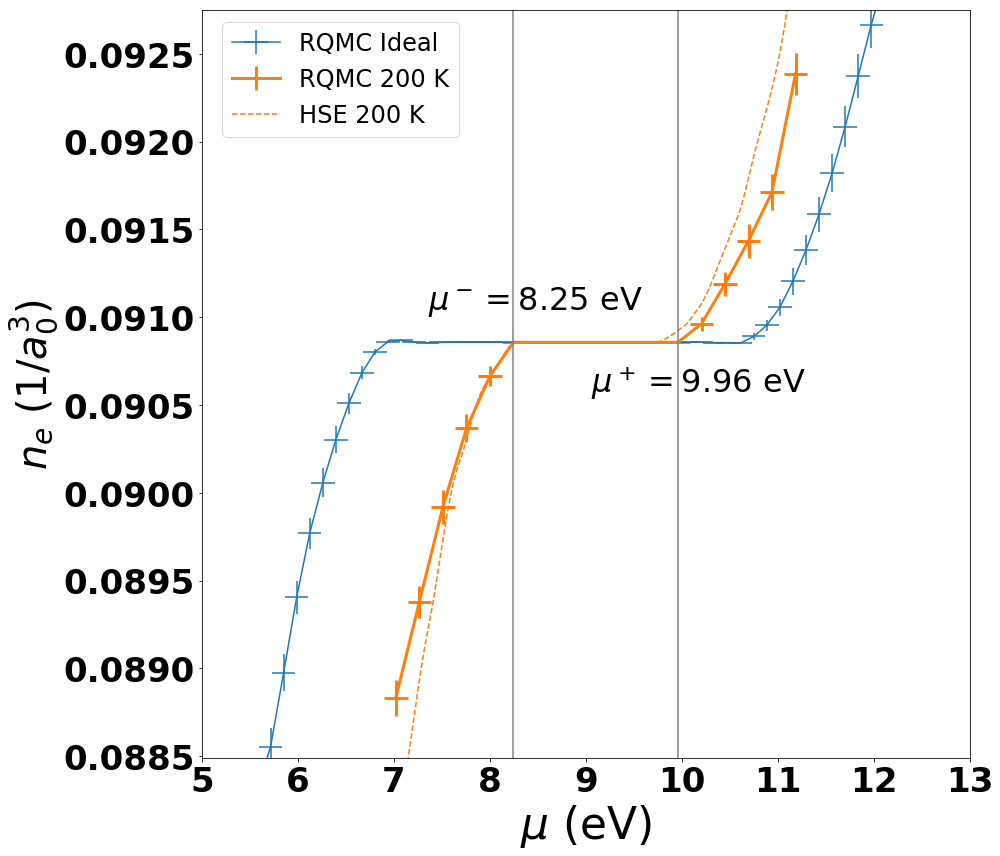

In [72]:
plt.figure(figsize=(14, 12))

#plt.subplot(1,2,1)
plt.xticks(fontsize=34,fontweight='bold')
plt.yticks(fontsize=34,fontweight='bold')
plt.xlabel("$\mu$ (eV)", fontsize=44)
#plt.grid()
plt.ylabel('$n_e$ ($1/a_0^3$)', fontsize=40)

a0=11.120467409715490*9.884202456312384*9.612747945355153
#plt.plot(GC_dataC2C[0][4],GC_dataC2C[0][0],'.')


plt.errorbar(GC_dataC2C250_8corrdVs[4][21:-10]*eV,
         savgol_filter(GC_dataC2C250_8corrdVs[0][21:-10],11,5)/a0,xerr=0.0045*eV,yerr=GC_dataC2C250_8corrdVs[3][21:-10]/a0,fmt='-',color='#1f77b4')
#plt.errorbar(GC_C2CP250_HSE_new[330:443,0]-.15,GC_C2CP250_HSE_new[330:443,2]+(96.-GC_C2CP250_HSE_new[numpy.where(GC_C2CP250_HSE_new[:,0]==10.),2]),fmt='--',color='#1f77b4')
#plt.errorbar(GC_C2CP250_HSE[2]*eV-.15,GC_C2CP250_HSE[0]*2,fmt='--',color='#ff7f0e')

plt.errorbar(C2CT200P250[4,2:-3]*eV,(C2CT200P250[0,2:-3])/a0,yerr=C2CT200P250[3,2:-3]/a0,linewidth=3,xerr=0.0045*eV,fmt='-',color='C1')
#plt.errorbar(numpy.nanmean(C2CT200_inv[0][:,0,2000:6000],axis=0)*eV,C2CT200_inv[0][0,1,2000:6000],xerr=numpy.nanstd(C2CT200_inv[0][:,0,2000:6000],axis=0)*eV/numpy.sqrt(39.),fmt='-',color='#1f77b4')

plt.errorbar(C2CT200P250_HSE[2]*eV-.35,savgol_filter(C2CT200P250_HSE[0]*2,201,5)/a0,fmt='--',color='C1')

plt.legend(['RQMC Ideal',
            #'HSE Ideal',
            'RQMC 200 K',
            'HSE 200 K'],bbox_to_anchor=(0.35, 1),fontsize=24)


#plt.errorbar(GC_dataC2C300_8corr[4][42:-30]*eV+2.5,
#         savgol_filter(GC_dataC2C300_8corr[0][42:-30],11,5),xerr=0.005*eV,yerr=GC_dataC2C300_8corr[3][42:-30],fmt='-',color='#ff7f0e')
#plt.errorbar(GC_C2CP300_HSE_new[360:460,0]+2.5-.15,GC_C2CP300_HSE_new[360:460,2]+(96.-GC_C2CP300_HSE_new[numpy.where(GC_C2CP250_HSE_new[:,0]==10.),2]),fmt='--',color='#ff7f0e')
#plt.errorbar(GC_C2CP300_HSE[2]*eV+2.5-.15,GC_C2CP300_HSE[0]*2,fmt='--',color='#ff7f0e')

#plt.errorbar(C2CT200P300[4,2:-3]*eV+2.5,savgol_filter(C2CT200P300[0,2:-3],5,3),yerr=C2CT200P300[3,2:-3],linewidth=3,xerr=0.0045*eV,fmt='-',color='#ff7f0e')
#plt.errorbar(numpy.nanmean(C2CT200_inv[1][:,0,2000:5500],axis=0)*eV+2.5,C2CT200_inv[1][0,1,2000:5500],xerr=numpy.nanstd(C2CT200_inv[1][:,0,2000:5500],axis=0)*eV/numpy.sqrt(39.),fmt='-',color='#ff7f0e')


#plt.errorbar(GC_dataC2C350_corr[4][19:-15]*eV,
#         savgol_filter(GC_dataC2C350_corr[0][19:-15],15,5),xerr=0.005*eV,yerr=GC_dataC2C350_corr[3][19:-15],fmt='-',color='#2ca02c')
#plt.errorbar(GC_dataC2C400_corr[4][27:-7]*eV,
#         savgol_filter(GC_dataC2C400_corr[0][27:-7],15,5),xerr=0.005*eV,yerr=GC_dataC2C400_corr[3][27:-7],fmt='-',color='#d62728')

plt.errorbar([C2CT200P250[4,7]*eV,C2CT200P250[4,7]*eV],[0.08,0.1],color='gray',fmt='-')
plt.errorbar([C2CT200P250[4,14]*eV,C2CT200P250[4,14]*eV],[0.08,0.1],color='gray',fmt='-')


plt.text(7.35,96.2/a0,"$\mu^-=%.2f$ eV" % (C2CT200P250[4,7]*eV),fontsize=32)
plt.text(9.05,95.7/a0,"$\mu^+=%.2f$ eV" % (C2CT200P250[4,14]*eV),fontsize=32)


plt.xlim(5,13.)
plt.ylim(93.5/a0,98/a0)

plt.tight_layout()
#plt.savefig('/local/home/vgorelov/Documents/Thesis/N_mu_C2C_P250T200hse_qmc.pdf',format='pdf')


In [ ]:
a = plt.axes([0.6, 0.22, .35, .35])
plt.xticks(fontsize=26,fontweight='bold')
plt.yticks(range(0,4),fontsize=26,fontweight='bold')
plt.xlabel("$\mu$, eV", fontsize=36)
plt.ylabel('$d n_e/d\mu$', fontsize=36)
#plt.grid(b=None, which='major', axis='both')

eb1=plt.errorbar(GC_dataC2C250_8corrdVs[4][25:-34]*eV,
        [0 if i<0 else i for i in numpy.gradient(savgol_filter(GC_dataC2C250_8corrdVs[0][25:-34],7,3),GC_dataC2C250_8corrdVs[4][25:-34]*eV,edge_order=1)],
         yerr=numpy.sqrt(GC_dataC2C250_8corrdVs[3][25:-34]**2+GC_dataC2C250_8corrdVs[3][26:-33]**2)/0.018/eV,xerr=0.0045*eV,
             linestyle='-',color='#1f77b4',linewidth=1.4)
eb1[-1][0].set_linestyle('-')
eb1[-1][1].set_linestyle('-')
#P250=return96forNaN(numpy.nanmean(C2CT200_inv[0][:,0,3000:5000:40],axis=0)*eV,C2CT200_inv[0][0,1,3000:5000:40])

#P300=return96forNaN(numpy.nanmean(C2CT200_inv[1][:,0,3000:5000:40],axis=0)*eV,C2CT200_inv[1][0,1,3000:5000:40])

eb2=plt.errorbar(C2CT200P250[4,2:-3]*eV,
        [0 if i<0 else i for i in numpy.gradient(savgol_filter(C2CT200P250[0,2:-3],5,3),C2CT200P250[4,2:-3]*eV,edge_order=1)],
         yerr=numpy.sqrt(C2CT200P250[3,3:-2]**2+C2CT200P250[3,2:-3]**2)/0.018/eV,xerr=0.0045*eV,
             linestyle='-',color='#1f77b4',linewidth=3)
eb2[-1][0].set_linestyle('-')
eb2[-1][1].set_linestyle('-')

eb3=plt.errorbar(C2CT200P300[4,2:-3]*eV,
        [0 if i<0.07 else i for i in numpy.gradient(savgol_filter(C2CT200P300[0,2:-3],5,3),C2CT200P300[4,2:-3]*eV,edge_order=1)],
         yerr=numpy.sqrt(C2CT200P300[3,3:-2]**2+C2CT200P300[3,2:-3]**2)/0.018/eV,xerr=0.0045*eV,
             linestyle='-',color='#ff7f0e',linewidth=3)
eb3[-1][0].set_linestyle('-')
eb3[-1][1].set_linestyle('-')


#plt.errorbar(numpy.nanmean(C2CT200_inv[1][:,0,3000:5000],axis=0)*eV,numpy.gradient(C2CT200_inv[1][0,1,3000:5000],numpy.nanmean(C2CT200_inv[1][:,0,3000:5000],axis=0)*eV,edge_order=2)-0.1,
#             xerr=0.0045*eV,fmt='.',linewidth=1.1,color='#ff7f0e')
#plt.errorbar(numpy.nanmean(C2CT200_inv[0][:,0,3000:5000],axis=0)*eV,numpy.gradient(C2CT200_inv[0][0,1,3000:5000],numpy.nanmean(C2CT200_inv[0][:,0,3000:5000],axis=0)*eV,edge_order=2)-0.1,
#             xerr=0.0045*eV,fmt='.',linewidth=1.1,color='#1f77b4')

plt.ylim(0,3)


<Container object of 3 artists>

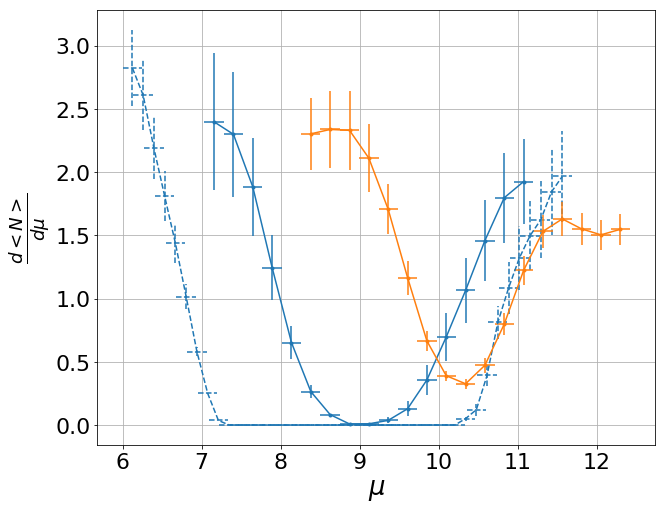

In [101]:
plt.figure(figsize=(10, 8))
plt.tick_params(labelsize=22)

plt.xlabel("$\mu$", fontsize=26)
#plt.title("C2c T200",fontsize=30)
plt.ylabel('$\\frac{d<N>}{d\mu}$', fontsize=26)
plt.grid(b=None, which='major', axis='both')

eb1=plt.errorbar(GC_dataC2C250_8corr[4][25:-34]*eV,
        [0 if i<0 else i for i in numpy.gradient(savgol_filter(GC_dataC2C250_8corr[0][25:-34],7,3),GC_dataC2C250_8corr[4][25:-34]*eV,edge_order=1)],
         yerr=numpy.sqrt(GC_dataC2C250_8corr[3][25:-34]**2+GC_dataC2C250_8corr[3][26:-33]**2)/0.018/eV,xerr=0.0045*eV,
             linestyle='--',color='#1f77b4')
eb1[-1][0].set_linestyle('--')
eb1[-1][1].set_linestyle('--')
plt.errorbar(C2CT200[0][2,0][7:24]*eV,numpy.gradient(C2CT200[0][0,0][7:24],C2CT200[0][2,0][7:24]*eV,edge_order=1),
             yerr=numpy.sqrt(C2CT200[0][0,1][7:24]**2+C2CT200[0][0,1][8:25]**2)/0.009/eV,xerr=0.0045*eV,fmt='.-')

plt.errorbar(C2CT200[1][2,0][12:29]*eV,numpy.gradient(C2CT200[1][0,0][12:29],C2CT200[1][2,0][12:29]*eV,edge_order=1),
             yerr=numpy.sqrt(C2CT200[1][0,1][12:29]**2+C2CT200[1][0,1][13:30]**2)/0.018/eV,xerr=0.0045*eV,fmt='.-')


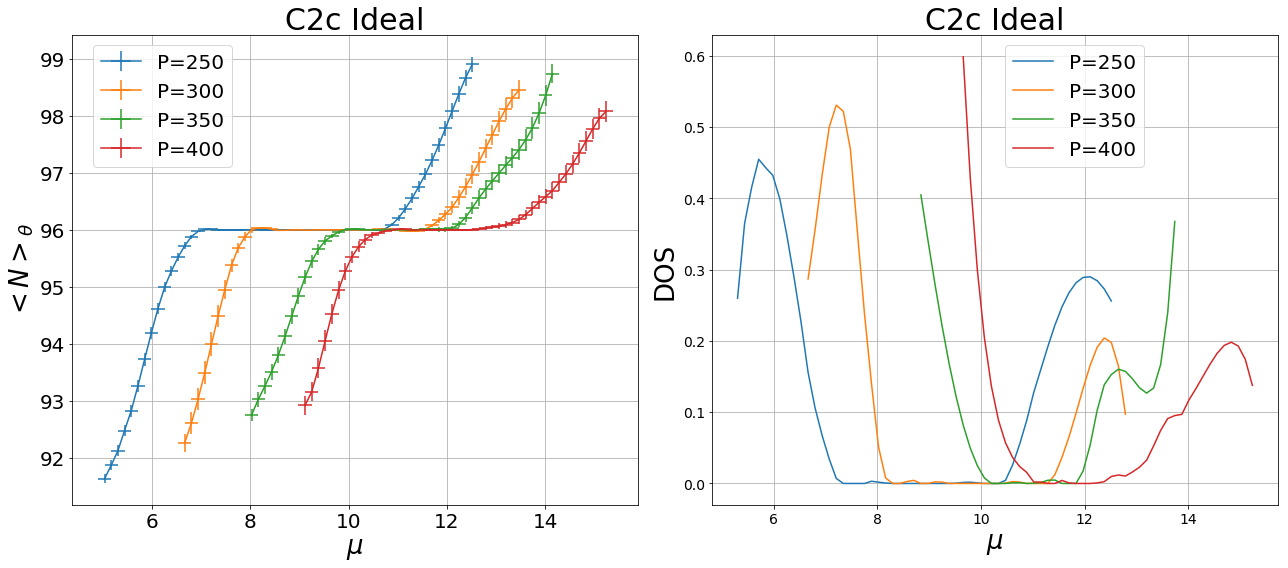

In [37]:
plt.figure(figsize=(18, 8))

plt.subplot(1,2,1)
plt.tick_params(labelsize=20)
plt.title('C2c Ideal', fontsize=30)
plt.xlabel("$\mu$", fontsize=26)
plt.grid()
plt.ylabel('$<N>_{\\theta}$', fontsize=26)
#plt.plot(GC_dataC2C[0][4],GC_dataC2C[0][0],'.')


plt.errorbar(GC_dataC2C250_8corr[4][2:-27]*eV,
         savgol_filter(GC_dataC2C250_8corr[0][2:-27],15,6),xerr=0.005*eV,yerr=GC_dataC2C250_8corr[3][2:-27],fmt='-',color='#1f77b4')
plt.errorbar(GC_dataC2C300_8corr[4][11:-20]*eV,
         savgol_filter(GC_dataC2C300_8corr[0][11:-20],19,5),xerr=0.005*eV,yerr=GC_dataC2C300_8corr[3][11:-20],fmt='-',color='#ff7f0e')
plt.errorbar(GC_dataC2C350_corr[4][19:-15]*eV,
         savgol_filter(GC_dataC2C350_corr[0][19:-15],15,5),xerr=0.005*eV,yerr=GC_dataC2C350_corr[3][19:-15],fmt='-',color='#2ca02c')
plt.errorbar(GC_dataC2C400_corr[4][27:-7]*eV,
         savgol_filter(GC_dataC2C400_corr[0][27:-7],15,5),xerr=0.005*eV,yerr=GC_dataC2C400_corr[3][27:-7],fmt='-',color='#d62728')


plt.legend(['P=250','P=300','P=350','P=400'],bbox_to_anchor=(0.3, 1),fontsize=20)


plt.subplot(1,2,2)
plt.tick_params(labelsize=14)
plt.title('C2c Ideal', fontsize=30)
plt.xlabel("$\mu$", fontsize=26)
plt.grid()
plt.ylabel('DOS', fontsize=26)
#plt.plot(GC_dataC2C[0][4],GC_dataC2C[0][0],'.')

#yerr=numpy.sqrt(GC_dataC2C250_corr[3][2:-27]**2+GC_dataC2C250_corr[3][3:-26]**2)
plt.plot(GC_dataC2C250_8corr[4][2:-27]*eV,
        [0 if i<0 else i for i in savgol_filter(GC_dataC2C250_8corr[0][2:-27],19,5,deriv=1)],
         '-',color='#1f77b4')
plt.plot(GC_dataC2C300_8corr[4][13:-25]*eV,
         [0 if i<0 else i for i in savgol_filter(GC_dataC2C300_8corr[0][13:-25],19,5,deriv=1)],
                        '-',color='#ff7f0e')
plt.plot(GC_dataC2C350_corr[4][25:-18]*eV,
         [0 if i<0 else i for i in savgol_filter(GC_dataC2C350_corr[0][25:-18],19,5,deriv=1)],
                        '-',color='#2ca02c')
plt.plot(GC_dataC2C400_corr[4][31:-7]*eV,
         [0 if i<0 else i for i in savgol_filter(GC_dataC2C400_corr[0][31:-7],19,5,deriv=1)],
                        '-',color='#d62728')


plt.legend(['P=250','P=300','P=350','P=400'],bbox_to_anchor=(0.5, 1),fontsize=20)

plt.tight_layout()
#plt.savefig('/local/home/vgorelov/Documents/Thesis/N_mu_C2C_DOS.pdf',format='pdf')



## Load DFT Benchmark C2c

In [11]:
C2C_HSE_BG=numpy.load('C2C_HSE_BG.npy')

In [57]:
GC_C2CP300_PBE=numpy.loadtxt('GC_C2CP300_PBE.out')
GC_C2CP300_vdW=numpy.loadtxt('GC_C2CP300_vdW.out')
GC_C2CP300_HSE=numpy.load('C2CP300/DFT/GC_C2CP300_HSE.npy')
GC_C2CP300_HSE_256=numpy.loadtxt('GC_C2CP300_HSE_256.out')

GC_C2CP250_HSE=numpy.load('C2CP250/DFT/HSE/GC_C2CP250_HSE.npy')
GC_C2CP250_vdW=numpy.loadtxt('GC_C2CP250_vdW.out' )
GC_C2CP500_HSE=numpy.loadtxt('GC_C2CP500_HSE.out' )
GC_C2CP500_vdW=numpy.loadtxt('GC_C2CP500_vdW.out' )

In [51]:
GC_C2CP300_vdW_new=numpy.loadtxt('DFT_Bench/C2C/P300/vdW/pwscf.dos')
GC_C2CP300_HSE_new=numpy.loadtxt('C2CP300/DFT/HSE/pwscf.dos')

GC_C2CP250_HSE_new=numpy.loadtxt('C2CP250/DFT/HSE/pwscf.dos')
GC_C2CP250_vdW_new=numpy.loadtxt('DFT_Bench/C2C/P250/vdW/pwscf.dos' )
GC_C2CP500_vdW_new=numpy.loadtxt('DFT_Bench/C2C/P500/vdW/pwscf.dos' )

In [32]:
mu_corr=numpy.zeros(GC_dataC2C10[0][4].shape)
mu_corr+=GC_dataC2C10[0][4]

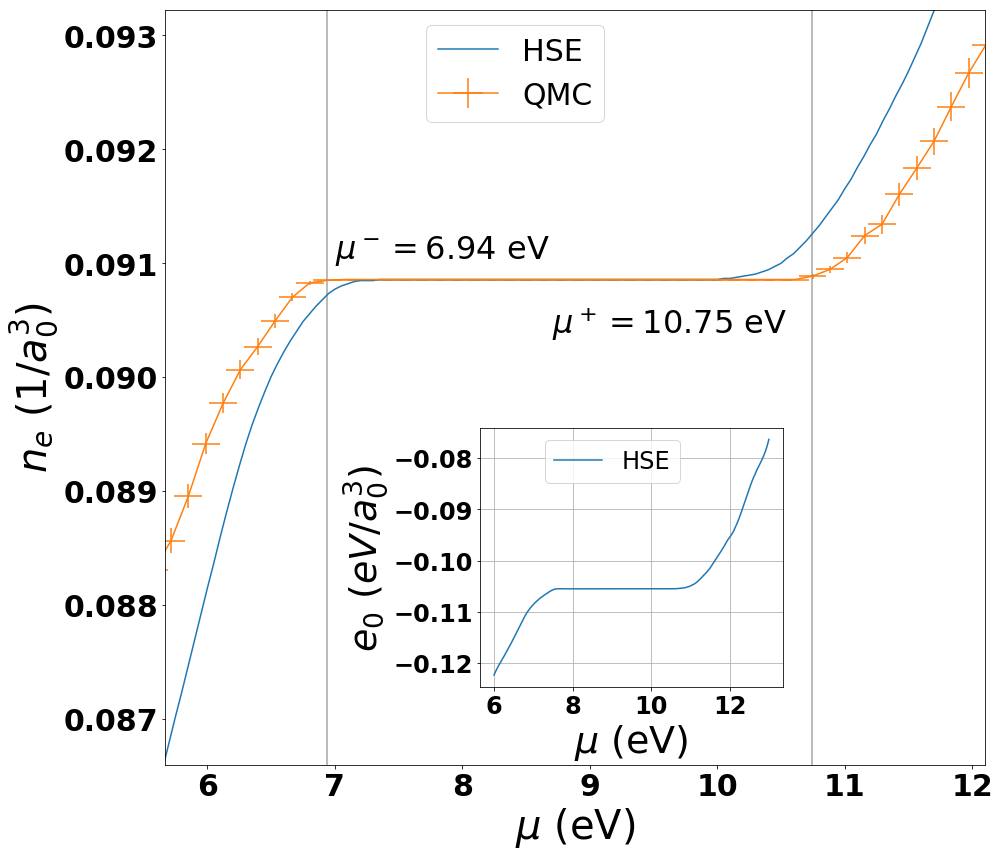

In [287]:
plt.figure(figsize=(14, 12))


plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')

plt.xlabel("$\mu$ (eV)", fontsize=40)
#plt.grid()
plt.ylabel('$n_e$ ($1/a_0^3$)', fontsize=40)
plt.ylim(91.5/a0,98.5/a0)
plt.xlim(5.67,12.1)

plt.text(7,96.2/a0,"$\mu^-=%.2f$ eV" % (BGC2CP250_8corr[1].beta[1]*eV),fontsize=32)
plt.text(8.7,95.5/a0,"$\mu^+=%.2f$ eV" % (BGC2CP250_8corr[0].beta[1]*eV),fontsize=32)

a0=11.120467409715490*9.884202456312384*9.612747945355153

#plt.plot((GC_C2CP250_HSE[0])*eV,GC_C2CP250_HSE[1]*2-96.,'--')
#plt.plot(GC_C2CP250_HSE[0]-0.015,GC_C2CP250_HSE[1]*2,'-.')
#plt.plot(GC_C2CP250_HSE[2]*eV,savgol_filter(GC_C2CP250_HSE[0]/a0*2,17,3))
plt.errorbar(GC_C2CP250_HSE_new[:,0]-0.5,(GC_C2CP250_HSE_new[:,2]+(96.-GC_C2CP250_HSE_new[numpy.where(GC_C2CP250_HSE_new[:,0]==10.),2]))/a0)
#plt.plot(GC_C2CP250_HSE_new[:,0]-0.3,GC_C2CP250_HSE_new[:,2]+14,'-')
#plt.errorbar(GC_dataC2C250_8corr[4][1:-10]*eV,(savgol_filter(GC_dataC2C250_8corr[0][1:-10],15,5)-96.),xerr=0.004*eV,yerr=GC_dataC2C250_8corr[3][1:-10],fmt='-')
plt.errorbar(GC_dataC2C250_8corrdVs[4][1:-10]*eV,(GC_dataC2C250_8corrdVs[0][1:-10])/a0,xerr=0.004*eV,yerr=GC_dataC2C250_8corrdVs[3][1:-10]/a0,fmt='-')

plt.legend(['HSE','QMC'],bbox_to_anchor=(0.3, 1),fontsize=30)

plt.plot([BGC2CP250_8corr[0].beta[1]*eV,BGC2CP250_8corr[0].beta[1]*eV],[90/a0,100/a0],alpha=0.7,color='gray')
plt.plot([BGC2CP250_8corr[1].beta[1]*eV,BGC2CP250_8corr[1].beta[1]*eV],[90/a0,100/a0],alpha=0.7,color='gray')

a = plt.axes([0.48, .2, .3, .3])

#plt.xlabel("$n_e$", fontsize=38)
#plt.xticks([0.0909,0.095],fontsize=24,fontweight='bold')
#plt.yticks(fontsize=20,fontweight='bold')
#plt.grid()
#plt.ylabel('$e_0$, eV', fontsize=36)

#plt.plot((GC_C2CP250_HSE[0]*2)/a0,GC_C2CP250_HSE[1]/a0*eV)

#b = plt.axes([0.397, .2, .27, .27])

plt.xlabel("$\mu$ (eV)", fontsize=38)
plt.xticks(range(6,14,2),fontsize=24,fontweight='bold')
plt.yticks(fontsize=24,fontweight='bold')
plt.grid()
plt.ylabel('$e_0$ ($eV/a_0^3$)', fontsize=38)

plt.plot(GC_C2CP250_HSE[2]*eV,savgol_filter(GC_C2CP250_HSE[1]/a0*eV,17,3))

plt.legend(['HSE'],bbox_to_anchor=(0.7, 1),fontsize=24)



plt.tight_layout()
#plt.savefig('/local/home/vgorelov/Documents/Thesis/DFT_RQMC_C2CP250dVs.pdf',dpi=300,format='pdf')



/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in divide


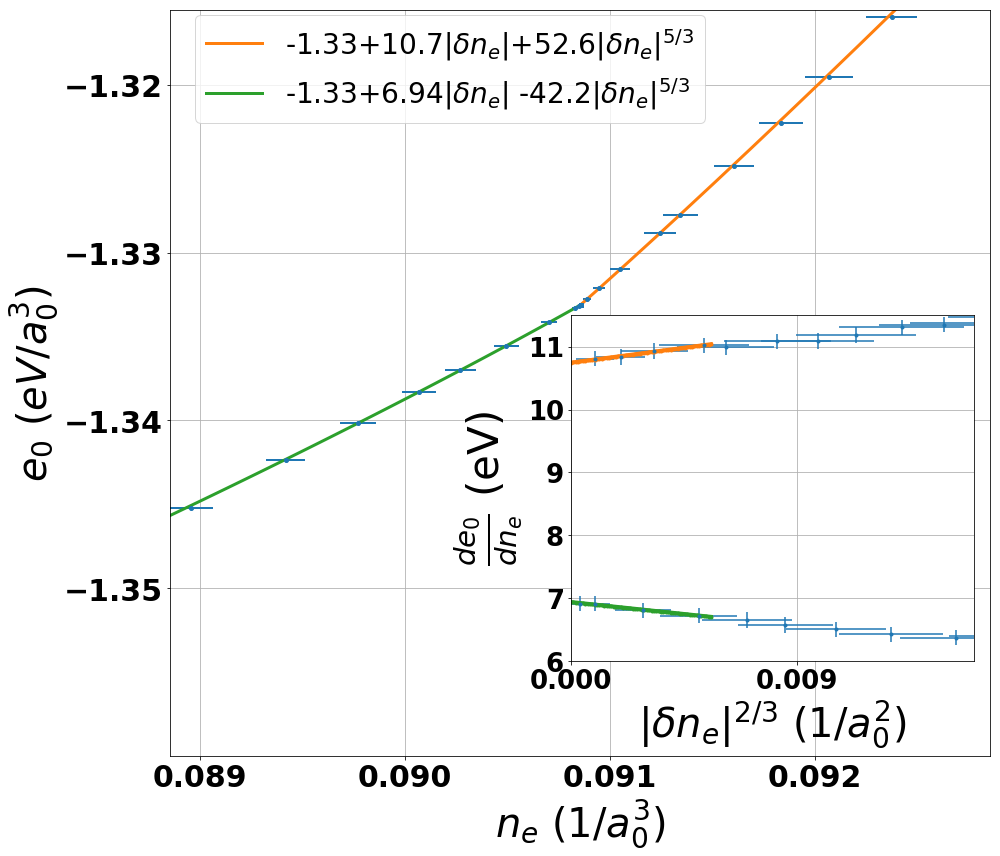

In [286]:

plt.figure(figsize=(14, 12))
#plt.tick_params(labelsize='large')
plt.xlabel("$n_e$ ($1/a_0^3$)", fontsize=40)
plt.xticks(numpy.arange(0.088,0.093,0.001),fontsize=30,fontweight='bold')
plt.yticks(numpy.arange(-1.35,-1.32,0.01),fontsize=30,fontweight='bold')
plt.grid()
plt.ylabel('$e_0$ ($eV/a_0^3$)', fontsize=40)
#plt.plot(GC_dataC2CTWIST[2][0],GC_dataC2CTWIST[2][1],'.-')
#plt.plot(GC_dataC2CTWIST[1][0],GC_dataC2CTWIST[1][1],'.-')
#plt.plot(GC_dataC2C[1][0],GC_dataC2C[1][1],'.-')
#plt.plot(GC_dataC2CTWIST[0][0],GC_dataC2CTWIST[0][1],'b.')
plt.xlim(93.88/a0,98.11/a0)
plt.ylim(-1437./a0,-1390/a0)

more_p=numpy.arange(96,99,0.02)
less_p=numpy.arange(93.8,96+0.02,0.02)


plt.errorbar((GC_dataC2C250_8corrdVs[0]/a0),GC_dataC2C250_8corrdVs[1]/a0*eV,xerr=GC_dataC2C250_8corrdVs[3]/a0,yerr=GC_dataC2C250_8corrdVs[2]/a0,fmt='.',markersize=8,elinewidth=2)

plt.plot((more_p)/a0,nonlinfunc(BGC2CP250_8corr[0].beta,(more_p))*eV/a0,'-',linewidth=3)
plt.plot((less_p)/a0,nonlinfunc(BGC2CP250_8corr[1].beta,(less_p))*eV/a0,'-',linewidth=3)



plt.legend(['%.2f+%.1f|$\delta n_e$|+%.1f|$\delta n_e$|$^{5/3}$' % (BGC2CP250_8corr[0].beta[0]*eV/a0,BGC2CP250_8corr[0].beta[1]*eV,BGC2CP250_8corr[0].beta[2]*eV*a0**(2/3.)),
            '%.2f+%.2f|$\delta n_e$| -%.1f|$\delta n_e$|$^{5/3}$' % (BGC2CP250_8corr[1].beta[0]*eV/a0,BGC2CP250_8corr[1].beta[1]*eV,BGC2CP250_8corr[1].beta[2]*eV*a0**(2/3.))], 
           bbox_to_anchor=(0.67, 0.83),fontsize=28)


a = plt.axes([0.57, .23, .4, .4])
plt.xticks(numpy.arange(0,0.0095,0.009),fontsize=26,fontweight='bold')
plt.yticks(fontsize=26,fontweight='bold')

#plt.title('C2C', fontsize=30)
plt.xlabel("$|\delta n_e|^{2/3}$ ($1/a_0^2$)", fontsize=40)
plt.grid()
plt.ylabel('$\\frac{de_0}{dn_e}$ (eV)', fontsize=42)
plt.xlim(0,17/a0)
plt.ylim(6,11.5)

more_p=numpy.arange(96,99,0.02)
less_p=numpy.arange(93.8,96+0.02,0.02)


plt.errorbar(abs((GC_dataC2C250_8corrdVs[0][50:]-96.)/a0)**(2./3.),abs(GC_dataC2C250_8corrdVs[1][50:]-BGC2CP250_8corr[0].beta[0])/abs((GC_dataC2C250_8corrdVs[0][50:]-96.))*eV,yerr=0.0045*eV,xerr=(GC_dataC2C250_8corrdVs[3][50:]/a0)**(2./3.),fmt='.')#,xerr=GC_dataC2CP250_8[3],yerr=GC_dataC2CP250_8[2],fmt='r.')
#
plt.plot(numpy.arange(0,6,0.1)/a0,linfunc(numpy.arange(0,6,0.1)/a0,BGC2CP250_8corr[0].beta[2]*a0**(2/3.),BGC2CP250_8corr[0].beta[1])*eV,'.-',linewidth=4)
plt.plot(numpy.arange(0,6,0.1)/a0,linfunc(numpy.arange(0,6,0.1)/a0,-BGC2CP250_8corr[1].beta[2]*a0**(2/3.),BGC2CP250_8corr[1].beta[1])*eV,'.-',linewidth=4)

#plt.errorbar(abs(GC_dataC2CP250_8[0]-96.)**(2./3.),GC_dataC2CP250_8[4],fmt='.')#,xerr=GC_dataC2CP250_8[3],yerr=GC_dataC2CP250_8[2],fmt='r.')
#plt.legend(['%.2f+%.2f|n|$^{2/3}$' % (BGC2CP250_8corr[0].beta[1]*eV,BGC2CP250_8corr[0].beta[2]*eV),
#            '%.2f-%.2f|n|$^{2/3}$' % (BGC2CP250_8corr[1].beta[1]*eV,BGC2CP250_8corr[1].beta[2]*eV)], 
#           bbox_to_anchor=(0.04, 0.28),fontsize=28)
plt.errorbar(abs((GC_dataC2C250_8corrdVs[0][:50]-96.)/a0)**(2./3.),abs(GC_dataC2C250_8corrdVs[1][:50]-BGC2CP250_8corr[1].beta[0])/abs((GC_dataC2C250_8corrdVs[0][:50]-96.))*eV,yerr=0.0045*eV,xerr=(GC_dataC2C250_8corrdVs[3][:50]/a0)**(2./3.),fmt='.',color='#1f77b4')#,xerr=GC_dataC2CP250_8[3],yerr=GC_dataC2CP250_8[2],fmt='r.')

plt.tight_layout()
#plt.savefig('/local/home/vgorelov/Documents/Thesis/RQMC_C2CP250dVs.pdf',dpi=300,format='pdf')


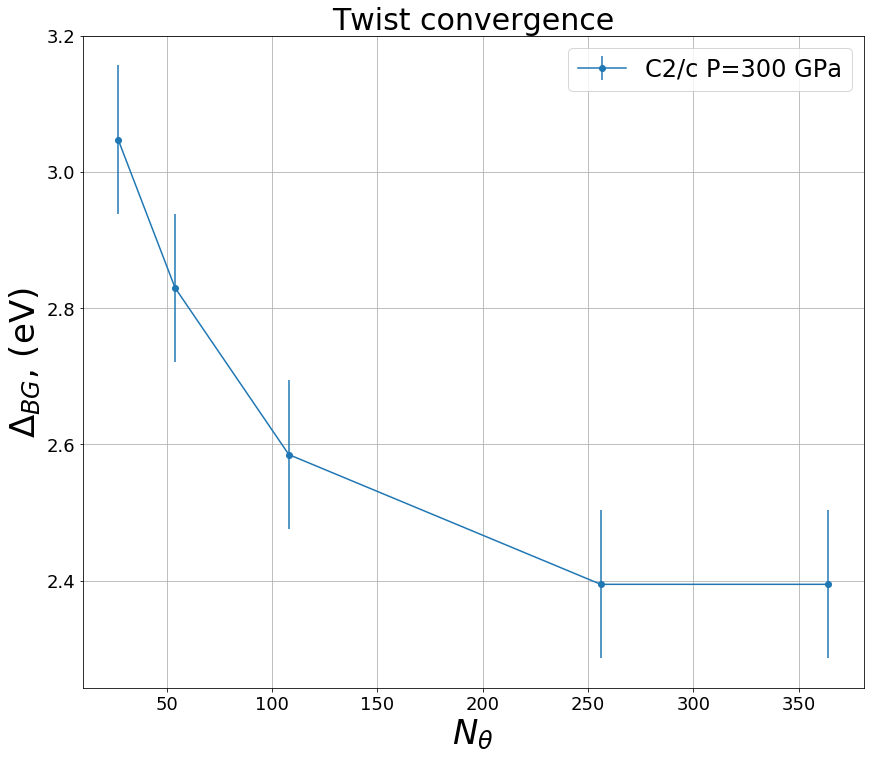

In [67]:
plt.figure(figsize=(14, 12))
plt.tick_params(labelsize=18)
plt.title('Twist convergence', fontsize=30)
plt.xlabel('$N_{\\theta}$', fontsize=34)
plt.grid()
plt.ylabel('$\Delta_{BG}$, (eV)', fontsize=34)
plt.errorbar([364,256,108,54,27],
         [GC_dataC2CTWIST[0][5],GC_dataC2Ctwist[0][5],GC_dataC2C[1][5],GC_dataC2CTWIST[1][5],GC_dataC2CTWIST[2][5]],
             yerr=0.004*27.2114,fmt='o-')

plt.legend(['C2/c P=300 GPa'],bbox_to_anchor=(1, 1),fontsize=24)
#plt.savefig('/local/home/vgorelov/Documents/Thesis/BG_twist_plato.pdf',format='pdf')


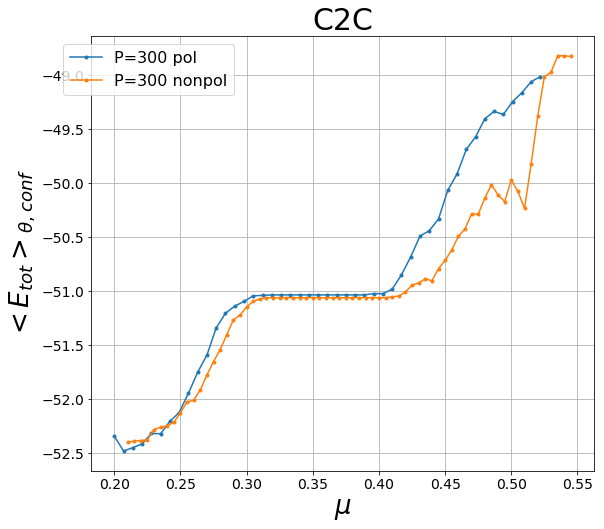

In [68]:
plt.figure(figsize=(9, 8))
plt.tick_params(labelsize=14)
plt.title('C2C', fontsize=30)
plt.xlabel("$\mu$", fontsize=26)
plt.grid()
plt.ylabel('$<E_{tot}>_{\\theta,conf}$', fontsize=26)
plt.plot(GC_dataC2Cspin[0][4],GC_dataC2Cspin[0][1],'.-')
plt.plot(GC_dataC2C[1][4],GC_dataC2C[1][1],'.-')


plt.legend(['P=300 pol','P=300 nonpol'],bbox_to_anchor=(0.3, 1),fontsize=16)
#plt.savefig('/Users/VitalyGorelov/Documents/AtoSiM/Thesis/E_mu_C2C_stat_spin.pdf',format='pdf')


# Analyses for Cmca12 Pc48 etc...

In [87]:
"load data for CMCA12"
M=108
nconf=[250,300,350,400]
nconf_e=[450,500]
dataCMCA12=[]
VdataCMCA12=[]
for i in nconf:
    dataCMCA12.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('CMCA12P%d/RMC/rmc%d.np.1.excite' % (i, k)),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            ))
    VdataCMCA12.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('CMCA12P%d/RMC/rmc%d.np.1.excite' % (i, k)),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             ))
for i in nconf_e:
    dataCMCA12.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('Cmcap%d/Cmcap%dt02np32%d.np.1.excite' % (i,i,k)),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            ))
    VdataCMCA12.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('Cmcap%d/Cmcap%dt02np32%d.np.1.excite' % (i,i,k)),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             ))

In [71]:
"load data for CsIV"
M=108
nconf=[400]
dataCSIV=[]
VdataCSIV=[]
for i in nconf:
    dataCSIV.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('CSIVP%d/RMC/rmc%d.np.1.excite' % (i, k)),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            ))
    VdataCSIV.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('CSIVP%d/RMC/rmc%d.np.1.excite' % (i, k)),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             ))

routines.py:10: RuntimeWarning: invalid value encountered in sqrt
  return numpy.concatenate(([average], [numpy.sqrt(Var/(N/2.))]), axis=0)


## Load DFT Benchmark C2c

In [111]:
GC_CMCA12P250_HSE=numpy.loadtxt('GC_CMCA12P250_HSE.out')
GC_CMCA12P250_vdW=numpy.loadtxt('GC_CMCA12P250_vdW.out' )
GC_CMCA12P400_HSE=numpy.loadtxt('GC_CMCA12P400_HSE.out' )
GC_CMCA12P400_vdW=numpy.loadtxt('GC_CMCA12P400_vdW.out' )

# GC analyses

In [90]:
GC_dataCMCA12=[]
GC_dataCMCA12.append(GC_QMC(dataCMCA12[0],VdataCMCA12[0],0.2,0.47,0.008,M))
GC_dataCMCA12.append(GC_QMC(dataCMCA12[1],VdataCMCA12[1],0.24,0.51,0.008,M))
GC_dataCMCA12.append(GC_QMC(dataCMCA12[2],VdataCMCA12[2],0.28,0.53,0.008,M))
GC_dataCMCA12.append(GC_QMC(dataCMCA12[3],VdataCMCA12[3],0.32,0.58,0.008,M))
GC_dataCMCA12.append(GC_QMC(dataCMCA12[4],VdataCMCA12[4],0.35,0.58,0.008,M))
GC_dataCMCA12.append(GC_QMC(dataCMCA12[5],VdataCMCA12[5],0.36,0.6,0.008,M))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


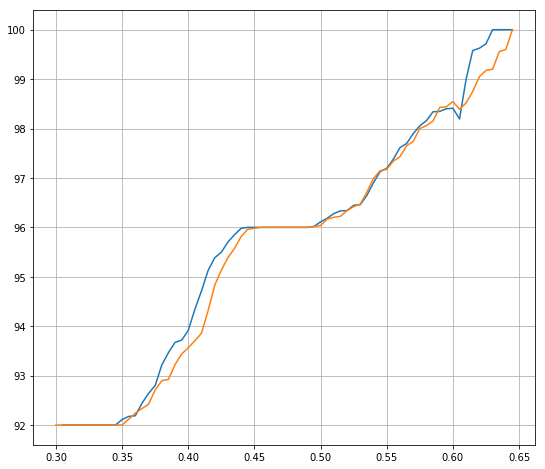

In [17]:
plt.figure(figsize=(9, 8))
plt.grid()
plt.plot(GC_dataC2C450_corr[4],GC_dataC2C450_corr[0])
plt.plot(GC_dataC2C450_OPT_corr[4],GC_dataC2C450_OPT_corr[0])
#plt.plot(GC_dataC2CP450[4],GC_dataC2CP450[0])
#plt.plot(GC_dataC2C[4][4],GC_dataC2C[4][0])

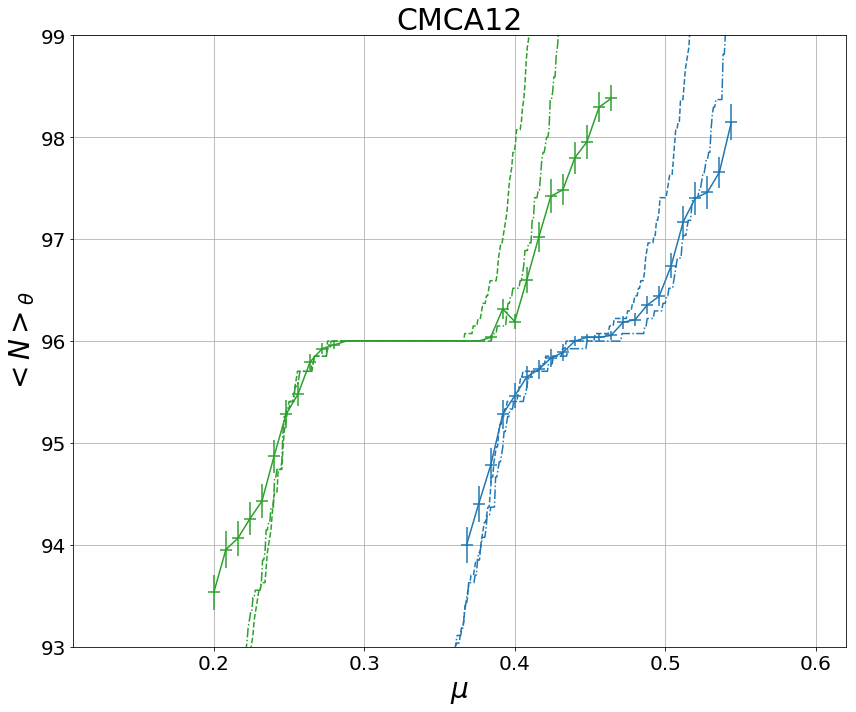

In [147]:
plt.figure(figsize=(12, 10))
plt.title('CMCA12', fontsize=30)

#plt.subplot(1,2,1)

plt.tick_params(labelsize=20)
plt.xlabel("$\mu$", fontsize=28)
plt.grid()
plt.ylabel('$<N>_{\\theta}$', fontsize=28)
plt.ylim(93,99)


plt.errorbar(GC_dataCMCA12[0][4],GC_dataCMCA12[0][0],xerr=0.004,yerr=GC_dataCMCA12[0][3],fmt='-',color='#2ca02c')
plt.plot(GC_CMCA12P250_vdW[0]-0.02,GC_CMCA12P250_vdW[1]*2,'--',color='#2ca02c')
plt.plot(GC_CMCA12P250_HSE[0]-0.012,GC_CMCA12P250_HSE[1]*2,'-.',color='#2ca02c')

plt.errorbar(GC_dataCMCA12[3][4][6:-4],GC_dataCMCA12[3][0][6:-4],xerr=0.004,yerr=GC_dataCMCA12[3][3][6:-4],fmt='-',color='#1f77b4')
plt.plot(GC_CMCA12P400_vdW[0]-0.013,GC_CMCA12P400_vdW[1]*2,'--',color='#1f77b4')
plt.plot(GC_CMCA12P400_HSE[0]-0.0023,GC_CMCA12P400_HSE[1]*2,'-.',color='#1f77b4')


#plt.errorbar(GC_dataCMCA128[0][4],GC_dataCMCA128[0][0],xerr=0.004,yerr=GC_dataCMCA128[0][3],fmt='-')
#plt.errorbar(GC_dataCMCA124[0][4],GC_dataCMCA124[0][0],xerr=0.004,yerr=GC_dataCMCA124[0][3],fmt='o-')

#plt.legend(['PBE','vdW-DF','QMC 10'],bbox_to_anchor=(0.4, 1),fontsize=24)


plt.tight_layout()

In [73]:
"trans and long directions CMCA12 P400"
b=numpy.array([36, 41, 66, 71, 72, 77, 102, 107])
GC_dataCMCA12trans=GC_QMC(dataCMCA12[3][:,b],VdataCMCA12[3][:,b],0.2,0.58,0.007,b.shape[0])
a=numpy.array([1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 25, 26, 27, 28, 31, 32, 33, 34])
GC_dataCMCA12long=GC_QMC(dataCMCA12[3][:,a],VdataCMCA12[3][:,a],0.2,0.58,0.007,a.shape[0])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [74]:
"trans and long directions CMCA12 P400 other dir"
b=[2,3,8,9,26,27,32,33]
GC_dataCMCA12transY=GC_QMC(dataCMCA12[3][:,b],VdataCMCA12[3][:,b],0.3,0.58,0.007,8)
a=numpy.array([12, 13, 16, 17, 18, 19, 22, 23, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])
GC_dataCMCA12longY=GC_QMC(dataCMCA12[3][:,a],VdataCMCA12[3][:,a],0.3,0.58,0.007,a.shape[0])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [75]:
"trans and long directions C2C P400"
b=numpy.array([6, 11, 12, 17, 18, 23, 24, 29])
GC_dataC2Ctrans=GC_QMC(dataC2C[3][:,b],VdataC2C[3][:,b],0.2,0.55,0.007,b.shape[0])
a=numpy.array([1, 2, 3, 4, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 102,
               103, 104, 105, 106, 107])
GC_dataC2Clong=GC_QMC(dataC2C[3][:,a],VdataC2C[3][:,a],0.2,0.55,0.007,a.shape[0])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [76]:
"trans and long directions C2C P400 Z"
b=numpy.array([12, 13, 16, 17, 18, 19, 22, 23])
GC_dataC2CtransZ=GC_QMC(dataC2C[3][:,b],VdataC2C[3][:,b],0.3,0.58,0.007,8)
a=numpy.array([2, 3, 8, 9, 26, 27, 32, 33, 38, 39, 44, 45, 50, 51, 56, 57, 62, 63, 68, 69, 74, 75, 80, 81, 86, 87, 92,
               93, 98, 99, 104, 105])
GC_dataC2ClongZ=GC_QMC(dataC2C[3][:,a],VdataC2C[3][:,a],0.3,0.58,0.007,a.shape[0])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [78]:
GC_dataCSIV=[]
GC_dataCSIV.append(GC_QMC(dataCSIV[0],VdataCSIV[0],0.47,0.57,0.007,M))

# CMCA12

In [79]:
for i in range(4):
    print(GC_dataCMCA12[i][5])

2.6122944
1.9592208
0.2176912
0.2176912


# Size effects

In [12]:
"size corrected CMCA12"
GC_dataCMCA12250_corr=numpy.loadtxt('GC_dataCMCA12250_corr.out') 
GC_dataCMCA12300_corr=numpy.loadtxt('GC_dataCMCA12300_corr.out') 
GC_dataCMCA12350_corr=numpy.loadtxt('GC_dataCMCA12350_corr.out') 
GC_dataCMCA12400=numpy.loadtxt('GC_dataCMCA12400.out') 


In [13]:
BGCMCA12=numpy.stack((getGAPS(GC_dataCMCA12250_corr[:,6:-29]),
                      getGAPS(GC_dataCMCA12300_corr[:,15:-26]),
                      getGAPS(GC_dataCMCA12350_corr[:,24:-18]),
                      getGAPS(GC_dataCMCA12400[:,15:50])))
print BGCMCA12

[[[4.48804253 1.33994001]
  [3.129311   0.136057  ]]

 [[3.71085795 0.32572428]
  [2.312969   0.136057  ]]

 [[3.66924334 4.50549932]
  [1.36057    0.136057  ]]

 [[0.91486567 0.36803446]
  [0.         0.136057  ]]]


In [14]:
numpy.save('BGCMCA12',BGCMCA12)

In [7]:
BGCMCA12=numpy.load('BGCMCA12.npy')

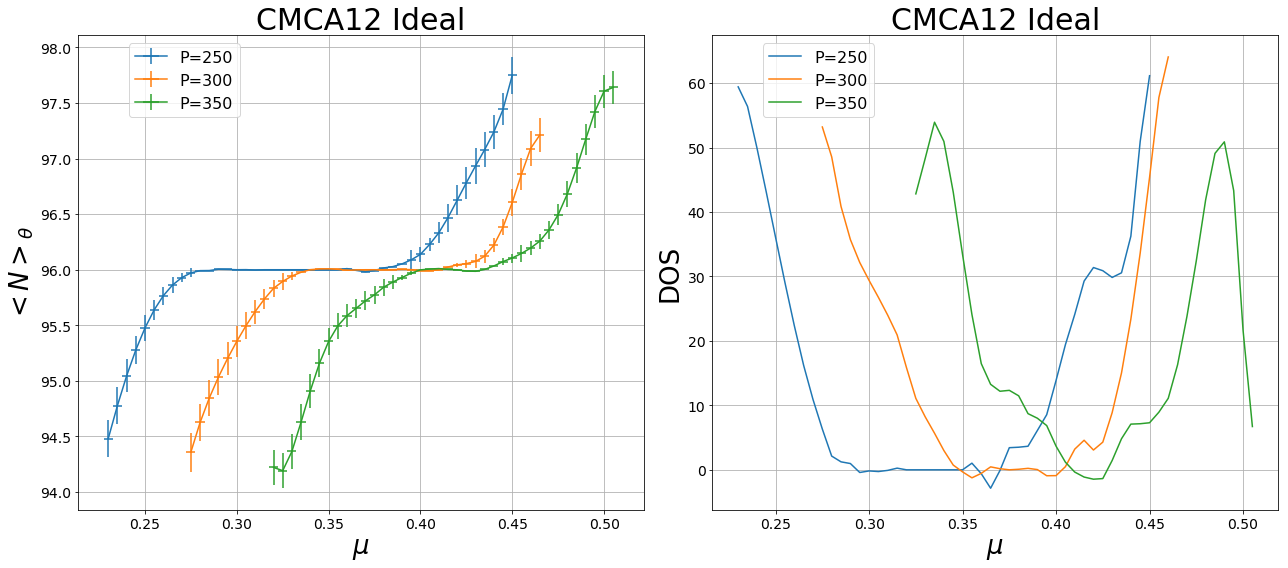

In [40]:
plt.figure(figsize=(18, 8))

plt.subplot(1,2,1)
plt.tick_params(labelsize=14)
plt.title('CMCA12 Ideal', fontsize=30)
plt.xlabel("$\mu$", fontsize=26)
plt.grid()
plt.ylabel('$<N>_{\\theta}$', fontsize=26)
#plt.plot(GC_dataCMCA12[0][4],GC_dataCMCA12[0][0],'.')


plt.errorbar(GC_dataCMCA12250_corr[4][6:-29],
         savgol_filter(GC_dataCMCA12250_corr[0][6:-29],15,5),xerr=0.0025,yerr=GC_dataCMCA12250_corr[3][6:-29],fmt='-',color='#1f77b4')
plt.errorbar(GC_dataCMCA12300_corr[4][15:-26],
         savgol_filter(GC_dataCMCA12300_corr[0][15:-26],15,5),xerr=0.0025,yerr=GC_dataCMCA12300_corr[3][15:-26],fmt='-',color='#ff7f0e')
plt.errorbar(GC_dataCMCA12350_corr[4][24:-18],
         savgol_filter(GC_dataCMCA12350_corr[0][24:-18],15,5),xerr=0.0025,yerr=GC_dataCMCA12350_corr[3][24:-18],fmt='-',color='#2ca02c')


plt.legend(['P=250','P=300','P=350','P=400'],bbox_to_anchor=(0.3, 1),fontsize=16)


plt.subplot(1,2,2)
plt.tick_params(labelsize=14)
plt.title('CMCA12 Ideal', fontsize=30)
plt.xlabel("$\mu$", fontsize=26)
plt.grid()
plt.ylabel('DOS', fontsize=26)
#plt.plot(GC_dataCMCA12[0][4],GC_dataCMCA12[0][0],'.')


plt.plot(GC_dataCMCA12250_corr[4][6:-29],
         numpy.gradient(savgol_filter(GC_dataCMCA12250_corr[0][6:-29],15,5),
                        GC_dataCMCA12250_corr[4][6:-29]),'-',color='#1f77b4')
plt.plot(GC_dataCMCA12300_corr[4][15:-27],
         numpy.gradient(savgol_filter(GC_dataCMCA12300_corr[0][15:-27],15,5),
                        GC_dataCMCA12300_corr[4][15:-27]),'-',color='#ff7f0e')
plt.plot(GC_dataCMCA12350_corr[4][25:-18],
         numpy.gradient(savgol_filter(GC_dataCMCA12350_corr[0][25:-18],15,5),
                        GC_dataCMCA12350_corr[4][25:-18]),'-',color='#2ca02c')

plt.legend(['P=250','P=300','P=350','P=400'],bbox_to_anchor=(0.3, 1),fontsize=16)

plt.tight_layout()
#plt.savefig('/local/home/vgorelov/Documents/Thesis/N_mu_CMCA12_DOS.pdf',format='pdf')



# End SE

In [62]:
C2C_HSE_BG.shape

(7, 2)

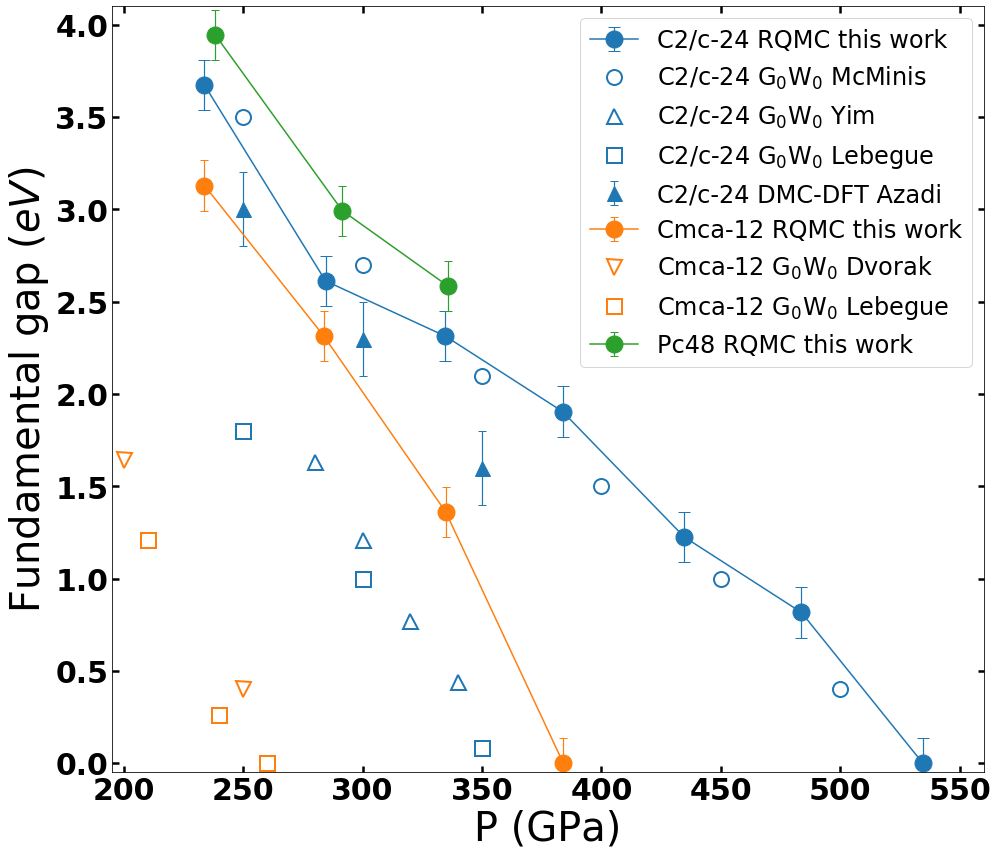

In [11]:
"BG with pressure"
plt.figure(figsize=(14, 12))
plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(numpy.arange(0,4.5,.5),fontsize=30,fontweight='bold')
#plt.title('Fundamental gap for phase III for ideal crystal', fontsize=34)
plt.xlabel("P (GPa)", fontsize=40)
#plt.grid()
plt.tick_params('both',which='both',direction='in',right=True,top=True,length=6.5,width=2.5)
plt.ylabel('Fundamental gap ($eV$)', fontsize=40)
#yerr_C2C=numpy.zeros(6)
#yerr_CMCA12=numpy.zeros(6)
#yerr_PC48=numpy.zeros(3)
#for i in range(6):
#    yerr_C2C[i]=max(VdataC2C[i][0]/numpy.sqrt(2.))*27.2114
#    yerr_CMCA12[i]=max(VdataCMCA12[i][0]/numpy.sqrt(2.))*27.2114
#for i in range(3):
#    yerr_PC48[i]=max(VdataPC48[i][0]/numpy.sqrt(2.))*27.2114
#,434.8,484.7
plt.errorbar([233.8,284.5,334.7,383.7,434.7,483.7,534.5],BGC2C[:7,1,0],#,GC_dataC2C[4][5],GC_dataC2C[5][5]],
             yerr=BGC2C[:7,1,1], fmt='o-',ms='17',capsize=6,elinewidth=1.2,color='#1f77b4')
plt.errorbar([250,300,350,400,450,500],[3.5,2.7,2.1,1.5,1,0.4],fmt='o',markeredgewidth=2,fillstyle='none',ms='15',capsize=4,elinewidth=1.2,color='#1f77b4')
plt.errorbar([280,300,320,340],[1.63,1.21,0.77,0.44],fmt='^',ms='15',markeredgewidth=2,fillstyle='none',capsize=2,elinewidth=1.2,color='#1f77b4')

plt.errorbar([250,300,350],[1.8,1.0,0.08],fmt='s',ms='15',markeredgewidth=2,fillstyle='none',capsize=4,elinewidth=1.2,color='#1f77b4')


plt.errorbar([250,300,350],[3.0,2.3,1.6],yerr=0.2,fmt='^',ms='15',capsize=4,elinewidth=1.2,color='#1f77b4')

plt.errorbar([233.8,283.8,334.8,384],BGCMCA12[:,1,0],
             yerr=BGCMCA12[:,1,1], fmt='o-',ms='17',capsize=4,elinewidth=1.2,color='#ff7f0e')

plt.errorbar([200,250],[1.64,0.4],fmt='v',ms='15',capsize=4,markeredgewidth=2,fillstyle='none',elinewidth=1.2,color='#ff7f0e')
#[1.8,0.55]
plt.errorbar([210,240,260],[1.21,0.26,0],fmt='s',ms='15',markeredgewidth=2,fillstyle='none',capsize=4,elinewidth=1.2,color='#ff7f0e')


#plt.errorbar([250,300],[1.29,0.12],yerr=0.07,fmt='o',ms='15',capsize=4,elinewidth=1.2)

#plt.errorbar([250,300],[1.02,0.16],yerr=0.05,fmt='o',ms='15',capsize=4,elinewidth=1.2)

#plt.errorbar([300,306,311,316],[2.25,2.22,2.17,2.07],yerr=0.05,fmt='o',ms='15',capsize=4,elinewidth=1.2)
#plt.errorbar([275,285,295,310],[1.61,1.49,1.25,1.1],yerr=0.05,fmt='o',ms='15',capsize=4,elinewidth=1.2)

plt.errorbar([238.3,291.5,335.7],BGPc48[:,1,0],
             yerr=BGPc48[:,1,1], fmt='o-',ms='17',capsize=4,elinewidth=1.2,color='#2ca02c')


#plt.errorbar([238.3,291.5,335.7],
#         [GC_dataPC48[0][5],GC_dataPC48[1][5],GC_dataPC48[2][5]],
#             yerr=yerr_PC48, fmt='s',ms='15',capsize=4,elinewidth=1.2)

plt.legend(['C2/c-24 RQMC this work','C2/c-24 G$_0$W$_0$ McMinis','C2/c-24 G$_0$W$_0$ Yim','C2/c-24 G$_0$W$_0$ Lebegue','C2/c-24 DMC-DFT Azadi',
            'Cmca-12 RQMC this work','Cmca-12 G$_0$W$_0$ Dvorak','Cmca-12 G$_0$W$_0$ Lebegue','Pc48 RQMC this work'],
           bbox_to_anchor=(1, 1),fontsize=24)
            #'T=200 K','T=300 K','T=100 K P. Loubeyere','T=300 K Howie'],bbox_to_anchor=(1, 1),fontsize=24)
#plt.errorbar([233.8,284.5,334.7,383.7,434.7,483.7,534.5],C2C_HSE_BG[:,0], fmt='o--',ms='17',capsize=6,elinewidth=1.2,color='#1f77b4')

#fit0=curve_fit(linfunc,[233.8,284.5,334.7,383.7],
#                    [GC_dataC2C[0][5],GC_dataC2C[1][5],GC_dataC2C[2][5],GC_dataC2C[3][5]],
#                    sigma=yerr_C2C[:4])
#plt.plot(numpy.array((230,503)),linfunc(numpy.array((230,503)),*fit0[0]),'-',color='#1f77b4')

#fitCMCA12=curve_fit(linfunc,[233.8,283.8,334.8],
#                    [GC_dataCMCA12[0][5],GC_dataCMCA12[1][5],GC_dataCMCA12[2][5]],
#                    sigma=yerr_CMCA12[:3])
#plt.plot(numpy.array((230,360)),linfunc(numpy.array((230,360)),*fitCMCA12[0]),'-',color='#8c564b')

#fitPC48=curve_fit(linfunc,[238.3,291.5,335.7],
#                    [GC_dataPC48[0][5],GC_dataPC48[1][5],GC_dataPC48[2][5]],
#                    sigma=yerr_PC48)
#plt.plot(numpy.array((230,360)),linfunc(numpy.array((230,360)),*fitPC48[0]),'-',color='#bcbd22')


#fit200=curve_fit(linfunc,[250,300],
#                    [1.29,0.12],
#                    sigma=[0.07,0.07])
#plt.plot(numpy.array((247,310)),linfunc(numpy.array((247,310)),*fit200[0]),'-',color='#9467bd')

plt.xlim(195,560)
plt.ylim(-0.05,4.1)
plt.tight_layout()
#plt.savefig('/local/home/vgorelov/Documents/Thesis/BG_PT0.pdf',format='pdf')


# PC48

In [4]:
"load data for PC48"
M=108
nconf=[250]
nconf_e=[300,350]
dataPC48=[]
VdataPC48=[]
for i in nconf:
    dataPC48.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('PC48P%d/RMC/rmc%d.np.1.excite' % (i, k)),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            ))
    VdataPC48.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('PC48P%d/RMC/rmc%d.np.1.excite' % (i, k)),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             ))
for i in nconf_e:
    dataPC48.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('Pc48p%d/Pc48p%dt02np32%d.np.1.excite' % (i,i,k)),
                                                               usecols=(range(0,M*2,2)), skiprows=10))[0] 
                              for k in range(-6,7,2))
                            ))
    VdataPC48.append(numpy.stack((routines.AverageAndVar(numpy.loadtxt(('Pc48p%d/Pc48p%dt02np32%d.np.1.excite' % (i,i,k)),
                                                          usecols=(range(0,M*2,2)), skiprows=10))[1] 
                               for k in range(-6,7,2))
                             ))

In [5]:
GC_dataPC48=[]
#numpy.set_printoptions(threshold=numpy.nan)
GC_dataPC48.append(GC_QMC(dataPC48[0],VdataPC48[0],0.2,0.5,0.008,M))
GC_dataPC48.append(GC_QMC(dataPC48[1],VdataPC48[1],0.2,0.6,0.008,M))
GC_dataPC48.append(GC_QMC(dataPC48[2],VdataPC48[2],0.25,0.6,0.008,M))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


In [15]:
"size corrected Pc48"
GC_dataPc48250_corr=numpy.loadtxt('GC_dataPc48250_corr.out') 
GC_dataPc48300_corr=numpy.loadtxt('GC_dataPc48300_corr.out') 
GC_dataPc48350_corr=numpy.loadtxt('GC_dataPc48350_corr.out') 


In [16]:
BGPc48=numpy.stack((getGAPS(GC_dataPc48250_corr[:,:50]),
                   getGAPS(GC_dataPc48300_corr[:,10:58]),
                   getGAPS(GC_dataPc48350_corr[:,20:67])))
print BGPc48

[[[8.76947554 1.11159746]
  [3.945653   0.136057  ]]

 [[0.40509762 7.88493065]
  [2.993254   0.136057  ]]

 [[2.65503757 3.3274934 ]
  [2.585083   0.136057  ]]]


In [17]:
numpy.save('BGPc48',BGPc48)

In [8]:
BGPc48=numpy.load('BGPc48.npy')

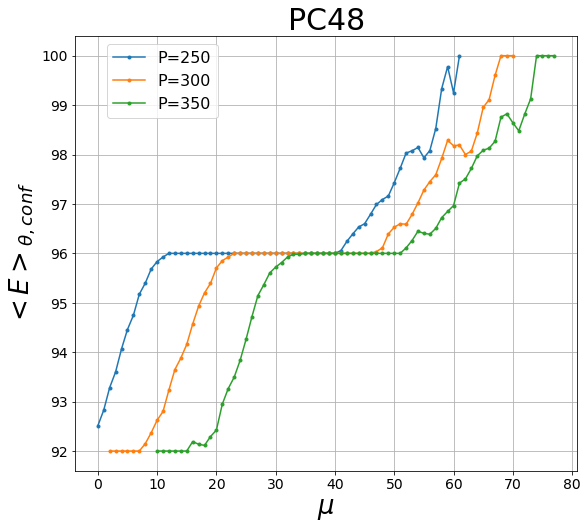

In [11]:
plt.figure(figsize=(9, 8))
plt.tick_params(labelsize=14)
plt.title('PC48', fontsize=30)
plt.xlabel("$\mu$", fontsize=26)
plt.grid()
plt.ylabel('$<E>_{\\theta,conf}$', fontsize=26)
#plt.plot(GC_dataPC48[0][4],GC_dataPC48[0][0],'.')
#plt.plot(GC_dataPC48[1][4],GC_dataPC48[1][0],'.')
#plt.plot(GC_dataPC48[2][4],GC_dataPC48[2][0],'.')

plt.plot(GC_dataPc48250_corr[0],'.-')
plt.plot(GC_dataPc48300_corr[0],'.-')
plt.plot(GC_dataPc48350_corr[0],'.-')

plt.legend(['P=250','P=300','P=350'],bbox_to_anchor=(0.3, 1),fontsize=16)

    #plt.errorbar(GC_data[i][4],GC_data[i][1],yerr=GC_data[i][2],xerr=0.008,fmt='o-',ms=4,mew=0.0)
#plt.errorbar(mu,E,yerr=VE,xerr=0.008,fmt='o-',ms=4,mew=0.0)
#plt.tight_layout()
#plt.savefig('/Users/VitalyGorelov/Documents/AtoSiM/Thesis/E_mu_PC48_stat.pdf',format='pdf')

#plt.figure(figsize=(7, 6))
#plt.tick_params(labelsize=16)
#plt.xlabel("$\mu$", fontsize=26)
#plt.ylabel('$<N>_{\\theta}$', fontsize=26)
#plt.errorbar(mu6,N6,yerr=VN6,xerr=0.008,fmt='o-',ms=4,mew=0.0)
#plt.errorbar(mu,N,yerr=VN,xerr=0.008,fmt='o-',ms=4,mew=0.0)
#plt.tight_layout()


# CSIV

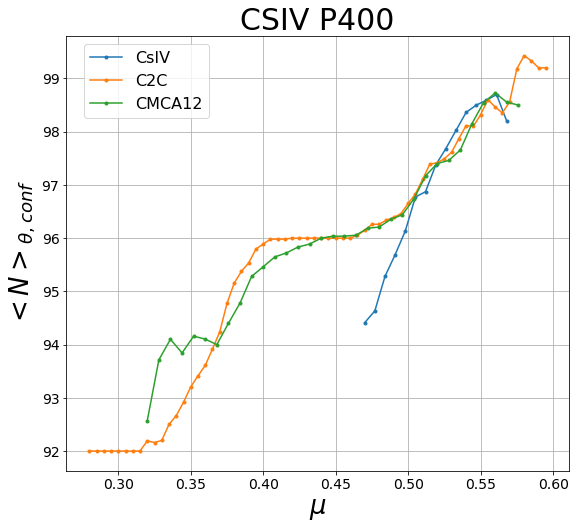

In [95]:
plt.figure(figsize=(9, 8))
plt.tick_params(labelsize=14)
plt.title('CSIV P400', fontsize=30)
plt.xlabel("$\mu$", fontsize=26)
plt.grid()
plt.ylabel('$<N>_{\\theta,conf}$', fontsize=26)
plt.plot(GC_dataCSIV[0][4],GC_dataCSIV[0][0],'.-')
plt.plot(GC_dataC2C[3][4],GC_dataC2C[3][0],'.-')
plt.plot(GC_dataCMCA12[3][4],GC_dataCMCA12[3][0],'.-')


plt.legend(['CsIV','C2C','CMCA12'],bbox_to_anchor=(0.3, 1),fontsize=16)
#plt.savefig('/Users/VitalyGorelov/Documents/AtoSiM/Thesis/N_mu_CSIV_stat.pdf',format='pdf')


In [25]:
def OptProp(omega,Cond1,Cond2):
    #8065.54*omega
    CtoAU=2.18e-7
    dimless=9e9*6.58e-16*2. # ohm*m to s | eV to s-1 transform <- k_e*h_bar
    eV=27.2114
    AUtoCM=5.3e-9
    Cond=Cond1+1j*Cond2
    epsilon=1+1j*4*numpy.pi*CtoAU*(Cond)/(omega/eV)
    R=numpy.absolute((1-numpy.sqrt(epsilon))/(numpy.sqrt(epsilon)+1))**2
    #R=((1-numpy.sqrt(epsilon).real)**2+numpy.sqrt(epsilon).imag**2)/((1+numpy.sqrt(epsilon).real)**2+numpy.sqrt(epsilon).imag**2)
    alpha=(2*(omega/eV)/137.)*numpy.sqrt(epsilon).imag
    return epsilon, R, alpha/AUtoCM

In [26]:
cond1_HSEC2CP300_2g=numpy.loadtxt('DFT_Bench/C2C/P300/HSE/sigma1-tensor-2g.dat',skiprows=5,usecols=(0,10))
cond2_HSEC2CP300_2g=numpy.loadtxt('DFT_Bench/C2C/P300/HSE/sigma2-tensor.dat',skiprows=5,usecols=(0,10))


In [28]:
cond1_HSEC2CP300_yy=numpy.loadtxt('DFT_Bench/C2C/P300/HSE/sigma1-tensor-2g.dat',skiprows=5,usecols=(0,5))
cond2_HSEC2CP300_yy=numpy.loadtxt('DFT_Bench/C2C/P300/HSE/sigma2-tensor.dat',skiprows=5,usecols=(0,5))
cond1_HSEC2CP300_xx=numpy.loadtxt('DFT_Bench/C2C/P300/HSE/sigma1-tensor-2g.dat',skiprows=5,usecols=(0,1))
cond2_HSEC2CP300_xx=numpy.loadtxt('DFT_Bench/C2C/P300/HSE/sigma2-tensor.dat',skiprows=5,usecols=(0,1))
cond1_HSEC2CP300_zz=numpy.loadtxt('DFT_Bench/C2C/P300/HSE/sigma1-tensor-2g.dat',skiprows=5,usecols=(0,9))
cond2_HSEC2CP300_zz=numpy.loadtxt('DFT_Bench/C2C/P300/HSE/sigma2-tensor.dat',skiprows=5,usecols=(0,9))


In [99]:
HSEC2CP300_opt_2g=(OptProp(cond1_HSEC2CP300_2g[:-2,0],cond1_HSEC2CP300_2g[:-2,1],-cond2_HSEC2CP300_2g[:,1]))


In [29]:
HSEC2CP300_opt_yy=(OptProp(cond1_HSEC2CP300_yy[:-2,0],cond1_HSEC2CP300_yy[:-2,1],-cond2_HSEC2CP300_yy[:,1]))
HSEC2CP300_opt_xx=(OptProp(cond1_HSEC2CP300_xx[:-2,0],cond1_HSEC2CP300_xx[:-2,1],-cond2_HSEC2CP300_xx[:,1]))
HSEC2CP300_opt_zz=(OptProp(cond1_HSEC2CP300_zz[:-2,0],cond1_HSEC2CP300_zz[:-2,1],-cond2_HSEC2CP300_zz[:,1]))


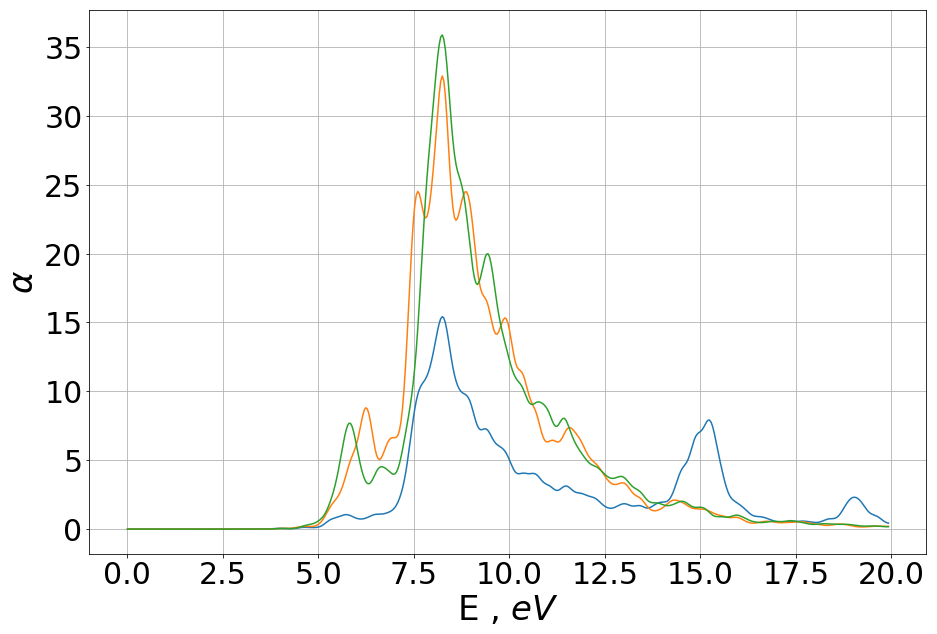

In [30]:
plt.figure(figsize=(15, 10))
plt.grid()
plt.tick_params(labelsize=30)
plt.xlabel("E , $eV$", fontsize=34)
#plt.title("CMCA12 T = 200 K",fontsize=30)
plt.ylabel('$\\alpha$', fontsize=34)

#plt.plot(cond1_HSEC2CP300_2g[:-2,0],HSEC2CP300_opt_2g[0][:].imag)
plt.plot(cond1_HSEC2CP300_yy[:-2,0],HSEC2CP300_opt_yy[0][:].imag)
plt.plot(cond1_HSEC2CP300_xx[:-2,0],HSEC2CP300_opt_xx[0][:].imag)
plt.plot(cond1_HSEC2CP300_zz[:-2,0],HSEC2CP300_opt_zz[0][:].imag)

(0, 5.5)

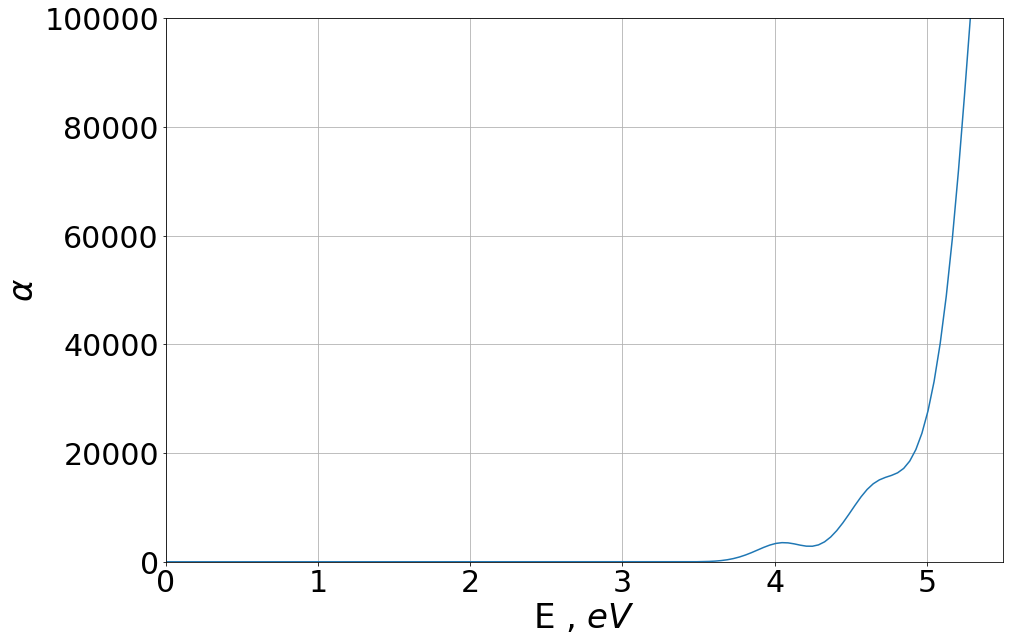

In [108]:
plt.figure(figsize=(15, 10))
plt.grid()
plt.tick_params(labelsize=30)
plt.xlabel("E , $eV$", fontsize=34)
#plt.title("CMCA12 T = 200 K",fontsize=30)
plt.ylabel('$\\alpha$', fontsize=34)

plt.plot(cond1_HSEC2CP300_2g[:-2,0],HSEC2CP300_opt_2g[2][:])
#plt.plot(cond1_HSEC2CP300_yy[:199,0],HSEC2CP300_opt_yy[2][:199]**0.5)
#plt.plot(cond1_HSEC2CP300_xx[:199,0],HSEC2CP300_opt_xx[2][:199]**0.5)
plt.ylim(0,100000)
plt.xlim(0,5.5)